# Home Credit Risk Assessment
Create Machine Learning to determine whether the loan is accepted or rejected & what are borrower's accepted criteria to determine next target market.

## Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#warnings
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

#Machine learning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report

In [2]:
#train dataset
df_train = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Science - Home Credit Indonesia\Final Task\home-credit-default-risk/application_train.csv')

In [3]:
#display dataset
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#row and column
df_train.shape

(307511, 122)

In [5]:
#categorical and numerical
categorical = df_train.select_dtypes(include='object')
numerical = df_train.select_dtypes(exclude='object')

#convert column to list
categorical_col = categorical.columns.to_list()
numerical_col = numerical.columns.to_list()

In [6]:
#describe numerical
df_train[numerical_col].describe().round(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,3.075110e+05,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.0,307511.00,307511.0,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.0,307511.00,307511.0,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,1.687979e+05,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.0,0.82,0.2,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,2.371231e+05,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.0,0.38,0.4,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.0

In [7]:
#describe categorical
df_train[categorical_col].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [8]:
#dataset type
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [9]:
df_train_2 = df_train.copy()

#### Number of customer based on Repayment Abilities

In [10]:
#create target column whether have payment difficulties
#0 : No payment difficulty
#1 : Payment difficulty
df_train_2['TARGET_DIFFICULTY'] = df_train_2['TARGET'].apply(lambda x: 'No payment difficulty' if x == 0 else 'Payment difficulty')

In [11]:
#groupby target difficulty
target_diff = df_train_2.groupby('TARGET_DIFFICULTY').agg(COUNT =('TARGET_DIFFICULTY','count')).reset_index()

In [12]:
target_diff

,TARGET_DIFFICULTY,COUNT
0,No payment difficulty,282686
1,Payment difficulty,24825


In [13]:
#percentage target difficulty
target_percent = df_train_2['TARGET_DIFFICULTY'].value_counts(normalize=True).reset_index()
target_percent

,index,TARGET_DIFFICULTY
0,No payment difficulty,0.919271
1,Payment difficulty,0.080729


In [14]:
#rename column index
target_percent.rename(columns={'index':'Difficulty'},inplace=True)

In [15]:
#percentage
target_percent['TARGET_DIFFICULTY'] = round(target_percent['TARGET_DIFFICULTY']*100,2)

In [16]:
target_percent

,Difficulty,TARGET_DIFFICULTY
0,No payment difficulty,91.93
1,Payment difficulty,8.07


Text(0.5, 1.0, 'The Distribution of Clients Repayment Abilities\n')

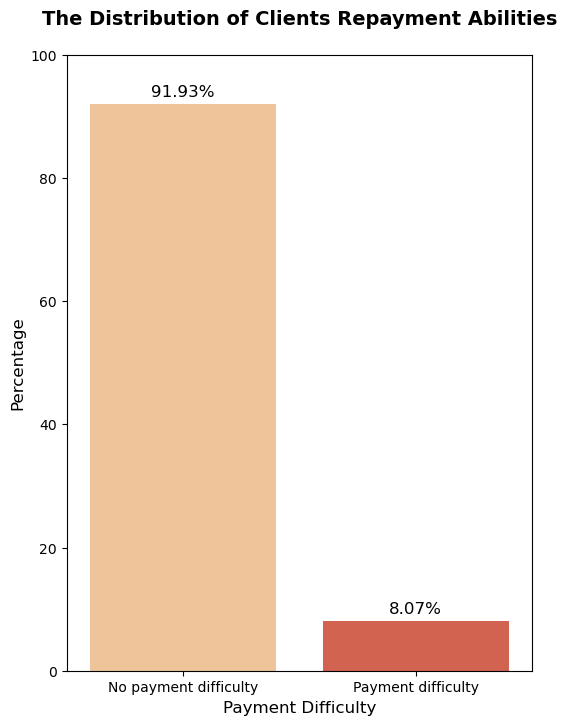

In [17]:
#plot target difficulty
plt.figure(figsize=(6,8))
sns.barplot(x='Difficulty', y='TARGET_DIFFICULTY', data=target_percent, palette='OrRd', label='Payment Difficulty')

#add text
for i,value in enumerate(target_percent['TARGET_DIFFICULTY']):
    text= f'{value}%'
    plt.text(i, value+2, text, fontsize=12, ha='center', va='center')
    

#set ylim
plt.ylim (0,100)

#add label axis
plt.xlabel('Payment Difficulty',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

#add title
plt.title('The Distribution of Clients Repayment Abilities\n',fontsize=14, fontweight ='bold')

**Insight:**  
- 91.93% customers didn't have payment difficulty. It means that the loan company performance is good and has good risk management also credit assessment.
- 8.07% customers have payment difficulty.  It means the loan company need to analyzing the characteristic of the customers, so they could identify early warnings sign, and implement the mitigation from failure of pay loans from customers.

### Bivariate Analysis

#### Contract Type VS Target Difficulty

In [18]:
df_train_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET_DIFFICULTY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Payment difficulty
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,No payment difficulty
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [19]:
#groupby contract per customer
df_contract = df_train_2.groupby(['NAME_CONTRACT_TYPE','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

In [20]:
#reset index
df_contract.reset_index(inplace=True)

In [21]:
#drop column index
df_contract.drop('index', axis=1, inplace=True)

In [22]:
df_contract

,NAME_CONTRACT_TYPE,TARGET_DIFFICULTY,CUSTOMER
0,Cash loans,No payment difficulty,255011
1,Revolving loans,No payment difficulty,27675
2,Cash loans,Payment difficulty,23221
3,Revolving loans,Payment difficulty,1604


In [23]:
#add column percentage
df_contract['Percentage'] = round((df_contract['CUSTOMER']/df_contract['CUSTOMER'].sum())*100,2)

In [24]:
df_contract

,NAME_CONTRACT_TYPE,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Cash loans,No payment difficulty,255011,82.93
1,Revolving loans,No payment difficulty,27675,9.00
2,Cash loans,Payment difficulty,23221,7.55
3,Revolving loans,Payment difficulty,1604,0.52


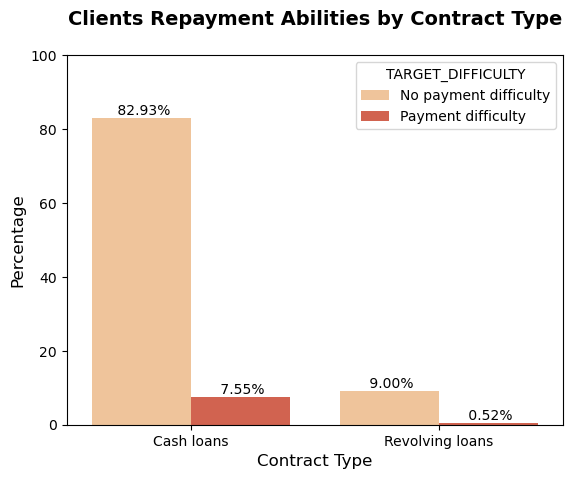

In [25]:
#plot dataset
ax = sns.barplot(x='NAME_CONTRACT_TYPE', y='Percentage', hue='TARGET_DIFFICULTY', data=df_contract, palette='OrRd')

#add text
for p in ax.patches:
    percentage = f'{p.get_height() : .2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x,y), size=10, ha='center', va='center')
    
#set ylim
plt.ylim(0,100)

#set title
plt.title('Clients Repayment Abilities by Contract Type\n', fontsize=14, fontweight='bold')

#set label
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

plt.show()

**Insight:**  
- **82.93% customers that do not have payment difficulty have cash loan contract type, and only 9% that choose revolving loan contract type**
- A cash loan is type of loan where the borrower receives a lump sum of money upfront and agrees to repay it in fixed, regular installments over a specified period (term). Cash loans are suitable for specific purpose like buying house or car
- A revolving loan is a type of loan that provides the borrower with a credit limit, and the borrower can use, repay, and reuse the credit as needed. The most common form of revolving loan is a credit card
- **The reason why cash loan preferred are Specific Purpose such as buying house, Predictable Repayment which knowing the exact amount of each installment, and have a structured repayment plan with a set term.**

#### Gender VS Target Difficulty

In [26]:
#groupby gender per customer
df_gender = df_train_2.groupby(['CODE_GENDER','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

In [27]:
#reset index
df_gender.reset_index(inplace=True)

#drop column index
df_gender.drop('index', axis=1, inplace=True)

In [28]:
#add column percentage
df_gender['Percentage'] = round((df_gender['CUSTOMER']/df_gender['CUSTOMER'].sum())*100,2)

In [29]:
#replace F to Female & M to Male
df_gender['CODE_GENDER'] = df_gender['CODE_GENDER'].apply(lambda x: 'Female' if x == 'F' else 'Male')

In [30]:
#display dataset
df_gender

,CODE_GENDER,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Female,No payment difficulty,188278,61.23
1,Male,No payment difficulty,94404,30.70
2,Female,Payment difficulty,14170,4.61
3,Male,Payment difficulty,10655,3.46
4,Male,No payment difficulty,4,0.00


In [31]:
#drop row XNA gender
df_gender.drop(4, inplace=True)

In [32]:
df_gender

,CODE_GENDER,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Female,No payment difficulty,188278,61.23
1,Male,No payment difficulty,94404,30.70
2,Female,Payment difficulty,14170,4.61
3,Male,Payment difficulty,10655,3.46


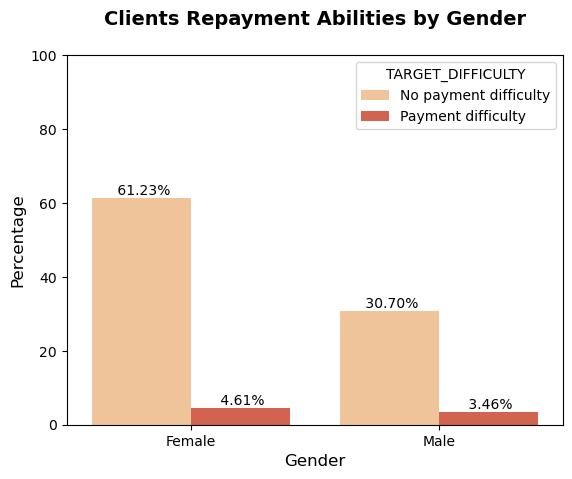

In [33]:
#plot dataset
ax_2 = sns.barplot(x='CODE_GENDER', y='Percentage', hue='TARGET_DIFFICULTY', data=df_gender, palette='OrRd')

#add text
for p in ax_2.patches:
    percentage = f'{p.get_height() : .2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 2
    ax_2.annotate(percentage, (x,y), size=10, ha='center', va='center')
    
#set ylim
plt.ylim(0,100)

#set title
plt.title('Clients Repayment Abilities by Gender\n', fontsize=14, fontweight='bold')

#set label
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

plt.show()

**Insight:**  
- **61.23% customers that do not have payment difficulty are female, and 30.70% are Male**
- The result was in line according to (Bermeo, 2018) that in UK, Women account for 65% of the home credit industry's customers  and women are also more inclined to work for the industry as loan agents. In this market a highly female-oriented demand meets with a highly feminized agency workforce.

#### Car Ownership VS Target Difficulty

In [34]:
#groupby car owership per customer
df_car = df_train_2.groupby(['FLAG_OWN_CAR','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

In [35]:
#reset index
df_car.reset_index(inplace=True)

#drop column index
df_car.drop('index', axis=1, inplace=True)

In [36]:
#replace Y to Own car & N to Don't own car
df_car['FLAG_OWN_CAR'] = df_car['FLAG_OWN_CAR'].apply(lambda x: 'Own car' if x == 'Y' else "Don't own car")

In [37]:
#add column percentage
df_car['Percentage'] = round((df_car['CUSTOMER']/df_car['CUSTOMER'].sum())*100,2)

In [38]:
df_car

,FLAG_OWN_CAR,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Don't own car,No payment difficulty,185675,60.38
1,Own car,No payment difficulty,97011,31.55
2,Don't own car,Payment difficulty,17249,5.61
3,Own car,Payment difficulty,7576,2.46


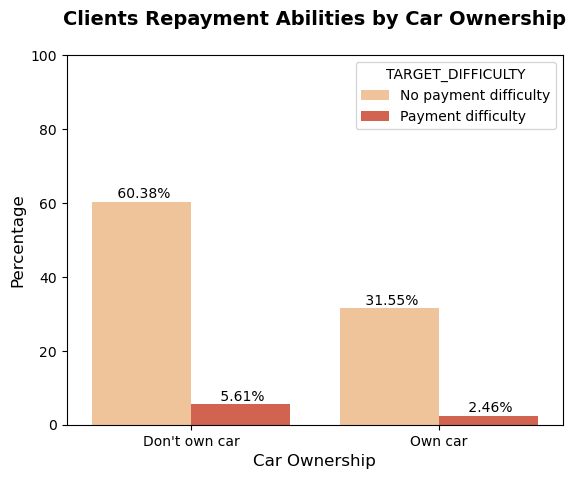

In [39]:
#plot dataset
ax_3 = sns.barplot(x='FLAG_OWN_CAR', y='Percentage', hue='TARGET_DIFFICULTY', data=df_car, palette='OrRd')

#add text
for p in ax_3.patches:
    percentage = f'{p.get_height() : .2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 2
    ax_3.annotate(percentage, (x,y), size=10, ha='center', va='center')
    
#set ylim
plt.ylim(0,100)

#set title
plt.title('Clients Repayment Abilities by Car Ownership\n', fontsize=14, fontweight='bold')

#set label
plt.xlabel('Car Ownership', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

plt.show()

**Insight:**  
- **60.38% customers that do not have payment difficulty are the one that don't own car, and 31.55% are having their own car**
-  The reasons why people who do not own a car might be more inclined to take on home credit because to budget constraints. They might allocate their financial resources to acquiring a home, considering it a more significant and long-term investment.

#### Realty Ownership Status VS Target Difficulty

In [40]:
#groupby realty owership per customer
df_realty = df_train_2.groupby(['FLAG_OWN_REALTY','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_realty.reset_index(inplace=True)

#drop column index
df_realty.drop('index', axis=1, inplace=True)

In [41]:
#replace Y to Own realty & N to Don't own realty 
df_realty['FLAG_OWN_REALTY'] = df_realty['FLAG_OWN_REALTY'].apply(lambda x: 'Own realty' if x == 'Y' else "Don't own realty")

#add column percentage
df_realty['Percentage'] = round((df_realty['CUSTOMER']/df_realty['CUSTOMER'].sum())*100,2)

#display
df_realty

,FLAG_OWN_REALTY,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Own realty,No payment difficulty,196329,63.84
1,Don't own realty,No payment difficulty,86357,28.08
2,Own realty,Payment difficulty,16983,5.52
3,Don't own realty,Payment difficulty,7842,2.55


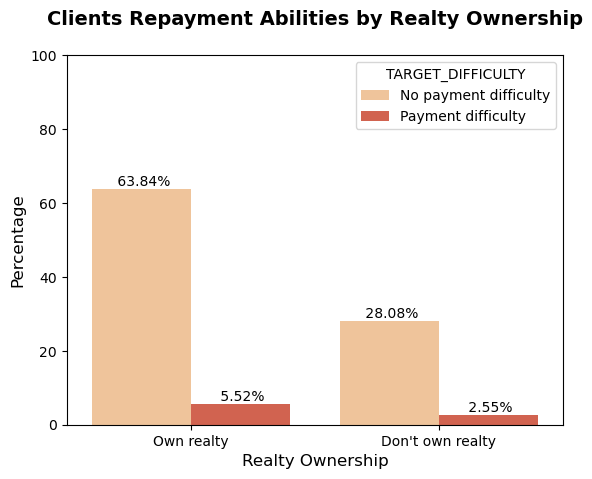

In [42]:
#plot dataset
ax_4 = sns.barplot(x='FLAG_OWN_REALTY', y='Percentage', hue='TARGET_DIFFICULTY', data=df_realty, palette='OrRd')

#add text
for p in ax_4.patches:
    percentage = f'{p.get_height() : .2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 2
    ax_4.annotate(percentage, (x,y), size=10, ha='center', va='center')
    
#set ylim
plt.ylim(0,100)

#set title
plt.title('Clients Repayment Abilities by Realty Ownership\n', fontsize=14, fontweight='bold')

#set label
plt.xlabel('Realty Ownership', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

plt.show()

**Insight:**  
- **63.84% customers that do not have payment difficulty are the one that own realty, and 28.08% are not their own realty**
- The reasons why individuals who already own real estate might be more inclined to take on additional home credit is because Homeownership is often seen as a form of investment. Individuals who already own real estate may view taking on more home credit as a way to further diversify their investment portfolio in the real estate market.

#### Suite Type VS Target Difficulty

In [43]:
#groupby suite type per customer
df_suite = df_train_2.groupby(['NAME_TYPE_SUITE','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_suite.reset_index(inplace=True)

#drop column index
df_suite.drop('index', axis=1, inplace=True)

In [44]:
#add column percentage
df_suite['Percentage'] = round((df_suite['CUSTOMER']/df_suite['CUSTOMER'].sum())*100,2)

#display
df_suite

,NAME_TYPE_SUITE,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Unaccompanied,No payment difficulty,228189,74.52
1,Family,No payment difficulty,37140,12.13
2,Unaccompanied,Payment difficulty,20337,6.64
3,"Spouse, partner",No payment difficulty,10475,3.42
4,Children,No payment difficulty,3026,0.99
5,Family,Payment difficulty,3009,0.98
6,Other_B,No payment difficulty,1596,0.52
7,"Spouse, partner",Payment difficulty,895,0.29
8,Other_A,No payment difficulty,790,0.26
9,Group of people,No payment difficulty,248,0.08


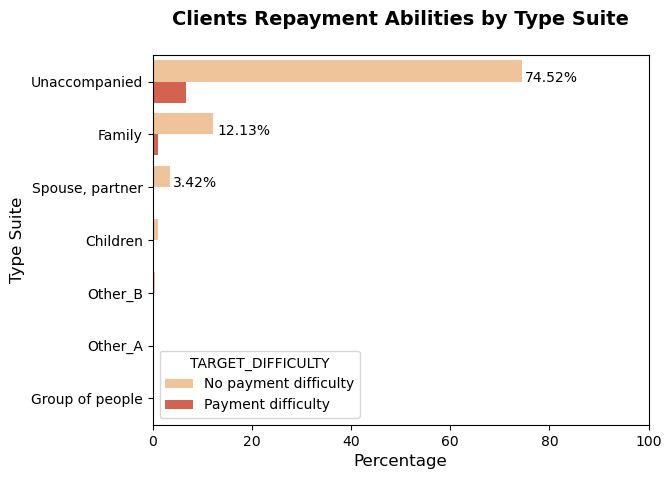

In [45]:
#plot dataset
ax_5 = sns.barplot(y='NAME_TYPE_SUITE', x='Percentage', hue='TARGET_DIFFICULTY', data=df_suite, palette='OrRd', orient='horizontal')

#add text
plt.text(x=75, y=0, s=f"{df_suite['Percentage'][0]}%") 
plt.text(x=13, y=1, s=f"{df_suite['Percentage'][1]}%")
plt.text(x=4, y=2, s=f"{df_suite['Percentage'][3]}%")
    
#set ylim
plt.xlim(0,100)

#set title
plt.title('Clients Repayment Abilities by Type Suite\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Type Suite', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

plt.show()

**Insight:**  
- **74.52% customers that do not have payment difficulty are unaccompanied**
- The reason most single people take home credit are they may have more flexibility in managing their finances and making decisions based solely on their own income and expenses. This could make it easier for them to qualify for a mortgage and manage the financial responsibilities of homeownership.

#### Income Type VS Target Difficulty

In [46]:
#groupby income type per customer
df_income = df_train_2.groupby(['NAME_INCOME_TYPE','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_income.reset_index(inplace=True)

#drop column index
df_income.drop('index', axis=1, inplace=True)

In [47]:
#add column percentage
df_income['Percentage'] = round((df_income['CUSTOMER']/df_income['CUSTOMER'].sum())*100,2)

#display
df_income

,NAME_INCOME_TYPE,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Working,No payment difficulty,143550,46.68
1,Commercial associate,No payment difficulty,66257,21.55
2,Pensioner,No payment difficulty,52380,17.03
3,State servant,No payment difficulty,20454,6.65
4,Working,Payment difficulty,15224,4.95
5,Commercial associate,Payment difficulty,5360,1.74
6,Pensioner,Payment difficulty,2982,0.97
7,State servant,Payment difficulty,1249,0.41
8,Student,No payment difficulty,18,0.01
9,Unemployed,No payment difficulty,14,0.00


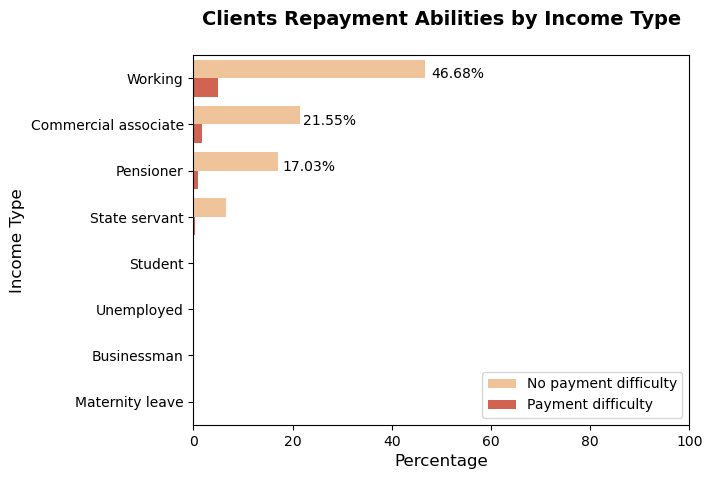

In [48]:
#plot dataset
ax_6 = sns.barplot(y='NAME_INCOME_TYPE', x='Percentage', hue='TARGET_DIFFICULTY', data=df_income, palette='OrRd', orient='horizontal')

#add text
plt.text(x=48, y=0, s=f"{df_income['Percentage'][0]}%") 
plt.text(x=22, y=1, s=f"{df_income['Percentage'][1]}%")
plt.text(x=18, y=2, s=f"{df_income['Percentage'][2]}%")
    
#set ylim
plt.xlim(0,100)

#set title
plt.title('Clients Repayment Abilities by Income Type\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Income Type', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

#legend
plt.legend(loc='lower right')

plt.show()

**Insight:**  
- **46.68% customers that do not have payment difficulty are working.**
- The reason most customers are worker is because Working individuals typically have a regular income from employment, which may make it easier to qualify for a mortgage.

#### Education Type VS Target Difficulty

In [49]:
#groupby income type per customer
df_education = df_train_2.groupby(['NAME_EDUCATION_TYPE','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_education.reset_index(inplace=True)

#drop column index
df_education.drop('index', axis=1, inplace=True)

In [50]:
#add column percentage
df_education['Percentage'] = round((df_education['CUSTOMER']/df_education['CUSTOMER'].sum())*100,2)

#display
df_education

,NAME_EDUCATION_TYPE,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Secondary / secondary special,No payment difficulty,198867,64.67
1,Higher education,No payment difficulty,70854,23.04
2,Secondary / secondary special,Payment difficulty,19524,6.35
3,Incomplete higher,No payment difficulty,9405,3.06
4,Higher education,Payment difficulty,4009,1.30
5,Lower secondary,No payment difficulty,3399,1.11
6,Incomplete higher,Payment difficulty,872,0.28
7,Lower secondary,Payment difficulty,417,0.14
8,Academic degree,No payment difficulty,161,0.05
9,Academic degree,Payment difficulty,3,0.00


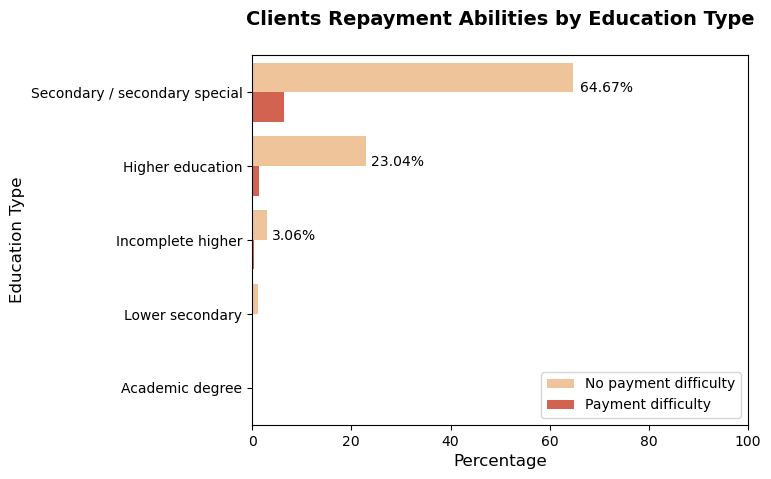

In [51]:
#plot dataset
ax_7 = sns.barplot(y='NAME_EDUCATION_TYPE', x='Percentage', hue='TARGET_DIFFICULTY', data=df_education, palette='OrRd', orient='horizontal')

#add text
plt.text(x=66, y=0, s=f"{df_education['Percentage'][0]}%") 
plt.text(x=24, y=1, s=f"{df_education['Percentage'][1]}%")
plt.text(x=4, y=2, s=f"{df_education['Percentage'][3]}%")
    
#set ylim
plt.xlim(0,100)

#set title
plt.title('Clients Repayment Abilities by Education Type\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Education Type', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

#legend
plt.legend(loc='lower right')

plt.show()

**Insight:**  
- **64.67% customers that do not have payment difficulty are secondary education, and 23.04% customer are having higher education**
- The reason most customers are secondary education is because Individuals with higher education may, on average, have higher earning potential. This could lead to a perception that those with secondary education are more likely to take home credit, as they might have a lower average income.

#### Family Status VS Target Difficulty

In [52]:
#groupby family status per customer
df_family = df_train_2.groupby(['NAME_FAMILY_STATUS','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_family.reset_index(inplace=True)

#drop column index
df_family.drop('index', axis=1, inplace=True)

In [53]:
#add column percentage
df_family['Percentage'] = round((df_family['CUSTOMER']/df_family['CUSTOMER'].sum())*100,2)

#display
df_family

,NAME_FAMILY_STATUS,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Married,No payment difficulty,181582,59.05
1,Single / not married,No payment difficulty,40987,13.33
2,Civil marriage,No payment difficulty,26814,8.72
3,Separated,No payment difficulty,18150,5.90
4,Widow,No payment difficulty,15151,4.93
5,Married,Payment difficulty,14850,4.83
6,Single / not married,Payment difficulty,4457,1.45
7,Civil marriage,Payment difficulty,2961,0.96
8,Separated,Payment difficulty,1620,0.53
9,Widow,Payment difficulty,937,0.30


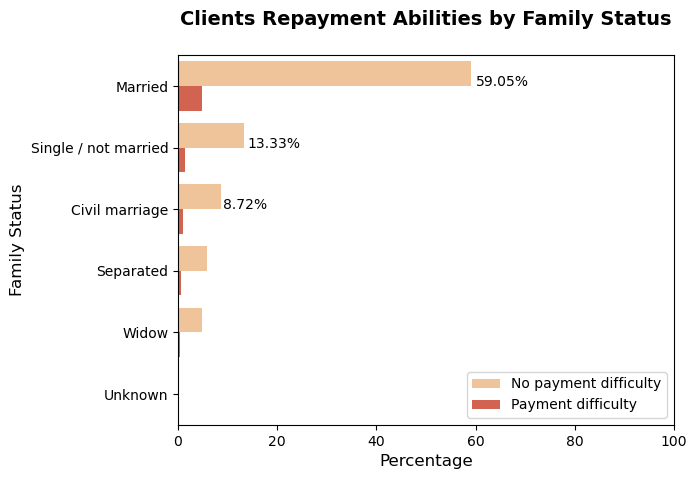

In [54]:
#plot dataset
ax_8 = sns.barplot(y='NAME_FAMILY_STATUS', x='Percentage', hue='TARGET_DIFFICULTY', data=df_family, palette='OrRd', orient='horizontal')

#add text
plt.text(x=60, y=0, s=f"{df_family['Percentage'][0]}%") 
plt.text(x=14, y=1, s=f"{df_family['Percentage'][1]}%")
plt.text(x=9, y=2, s=f"{df_family['Percentage'][2]}%")
    
#set ylim
plt.xlim(0,100)

#set title
plt.title('Clients Repayment Abilities by Family Status\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Family Status', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

#legend
plt.legend(loc='lower right')

plt.show()

**Insight:**  
- **59.05% customers that do not have payment difficulty are Married, and 13.33% customer are single**
- The reason most customers are married people is because they often plan for the future, including the possibility of starting a family. Homeownership is seen as providing a stable and permanent living environment for children.

#### Housing Type VS Target Difficulty

In [55]:
#groupby house type per customer
df_house = df_train_2.groupby(['NAME_HOUSING_TYPE','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_house.reset_index(inplace=True)

#drop column index
df_house.drop('index', axis=1, inplace=True)

In [56]:
#add column percentage
df_house['Percentage'] = round((df_house['CUSTOMER']/df_house['CUSTOMER'].sum())*100,2)

#display
df_house

,NAME_HOUSING_TYPE,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,House / apartment,No payment difficulty,251596,81.82
1,House / apartment,Payment difficulty,21272,6.92
2,With parents,No payment difficulty,13104,4.26
3,Municipal apartment,No payment difficulty,10228,3.33
4,Rented apartment,No payment difficulty,4280,1.39
5,Office apartment,No payment difficulty,2445,0.80
6,With parents,Payment difficulty,1736,0.56
7,Co-op apartment,No payment difficulty,1033,0.34
8,Municipal apartment,Payment difficulty,955,0.31
9,Rented apartment,Payment difficulty,601,0.20


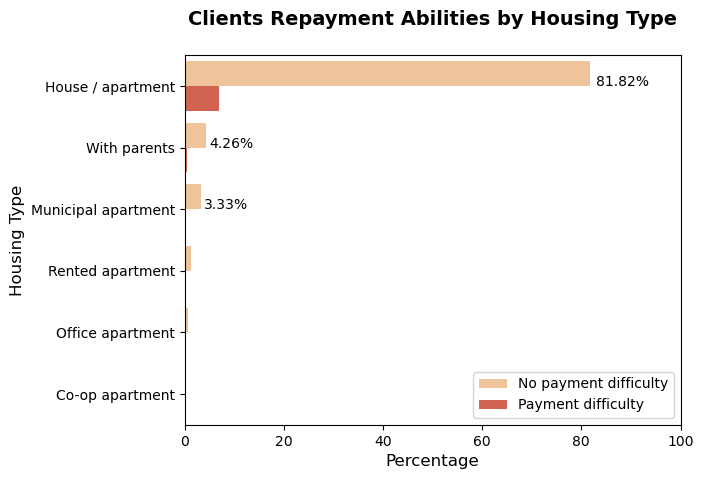

In [57]:
#plot dataset
ax_9 = sns.barplot(y='NAME_HOUSING_TYPE', x='Percentage', hue='TARGET_DIFFICULTY', data=df_house, palette='OrRd', orient='horizontal')

#add text
plt.text(x=83, y=0, s=f"{df_house['Percentage'][0]}%") 
plt.text(x=5, y=1, s=f"{df_house['Percentage'][2]}%")
plt.text(x=4, y=2, s=f"{df_house['Percentage'][3]}%")
    
#set ylim
plt.xlim(0,100)

#set title
plt.title('Clients Repayment Abilities by Housing Type\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Housing Type', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

#legend
plt.legend(loc='lower right')

plt.show()

**Insight:**  
- **81.82% customers that do not have payment difficulty have house or apartment**
- The reasons why individuals who already own house or apartment might be more inclined to take on additional home credit is because Homeownership is often seen as a form of investment. Individuals who already own real estate may view taking on more home credit as a way to further diversify their investment portfolio in the real estate market.

#### Occupation Type VS Target Difficulty

In [58]:
#groupby occupation type per customer
df_occupation = df_train_2.groupby(['OCCUPATION_TYPE','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_occupation.reset_index(inplace=True)

#drop column index
df_occupation.drop('index', axis=1, inplace=True)

In [59]:
#add column percentage
df_occupation['Percentage'] = round((df_occupation['CUSTOMER']/df_occupation['CUSTOMER'].sum())*100,2)

#display
df_occupation

,OCCUPATION_TYPE,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,Laborers,No payment difficulty,49348,23.37
1,Sales staff,No payment difficulty,29010,13.74
2,Core staff,No payment difficulty,25832,12.24
3,Managers,No payment difficulty,20043,9.49
4,Drivers,No payment difficulty,16496,7.81
5,High skill tech staff,No payment difficulty,10679,5.06
6,Accountants,No payment difficulty,9339,4.42
7,Medicine staff,No payment difficulty,7965,3.77
8,Security staff,No payment difficulty,5999,2.84
9,Laborers,Payment difficulty,5838,2.77


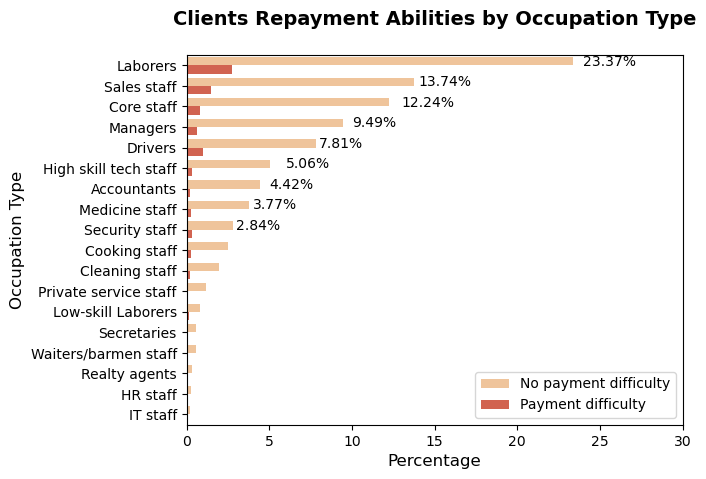

In [60]:
#plot dataset
ax_10 = sns.barplot(y='OCCUPATION_TYPE', x='Percentage', hue='TARGET_DIFFICULTY', data=df_occupation, palette='OrRd', orient='horizontal')

#add text
plt.text(x=24, y=0, s=f"{df_occupation['Percentage'][0]}%") 
plt.text(x=14, y=1, s=f"{df_occupation['Percentage'][1]}%")
plt.text(x=13, y=2, s=f"{df_occupation['Percentage'][2]}%")
plt.text(x=10, y=3, s=f"{df_occupation['Percentage'][3]}%")
plt.text(x=8, y=4, s=f"{df_occupation['Percentage'][4]}%")
plt.text(x=6, y=5, s=f"{df_occupation['Percentage'][5]}%")
plt.text(x=5, y=6, s=f"{df_occupation['Percentage'][6]}%")
plt.text(x=4, y=7, s=f"{df_occupation['Percentage'][7]}%")
plt.text(x=3, y=8, s=f"{df_occupation['Percentage'][8]}%")
    
#set ylim
plt.xlim(0,30)

#set title
plt.title('Clients Repayment Abilities by Occupation Type\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Occupation Type', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

#legend
plt.legend(loc='lower right')

plt.show()

**Insight:**  
- **23.37% customers that do not have payment difficulty are laborers**
- The reasons why most customers that takes home credit are laborers is depending on the specific type of work they are engaged in, may have a range of income levels. Some laborers may have incomes that make homeownership more feasible, especially if they are able to secure a mortgage with terms that align with their financial capacity.

#### Process Day VS Target Difficulty

In [61]:
#groupby Process Day per customer
df_day = df_train_2.groupby(['WEEKDAY_APPR_PROCESS_START','TARGET_DIFFICULTY']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)

#reset index
df_day.reset_index(inplace=True)

#drop column index
df_day.drop('index', axis=1, inplace=True)

In [62]:
#add column percentage
df_day['Percentage'] = round((df_day['CUSTOMER']/df_day['CUSTOMER'].sum())*100,2)

#display
df_day

,WEEKDAY_APPR_PROCESS_START,TARGET_DIFFICULTY,CUSTOMER,Percentage
0,TUESDAY,No payment difficulty,49400,16.06
1,WEDNESDAY,No payment difficulty,47696,15.51
2,MONDAY,No payment difficulty,46780,15.21
3,THURSDAY,No payment difficulty,46493,15.12
4,FRIDAY,No payment difficulty,46237,15.04
5,SATURDAY,No payment difficulty,31182,10.14
6,SUNDAY,No payment difficulty,14898,4.84
7,TUESDAY,Payment difficulty,4501,1.46
8,WEDNESDAY,Payment difficulty,4238,1.38
9,FRIDAY,Payment difficulty,4101,1.33


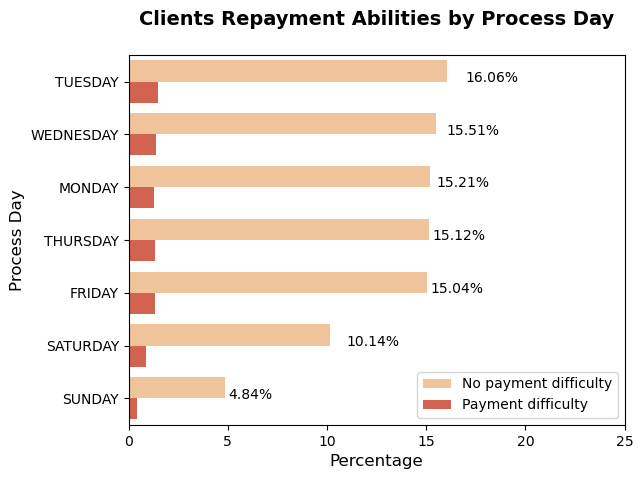

In [63]:
#plot dataset
ax_11 = sns.barplot(y='WEEKDAY_APPR_PROCESS_START', x='Percentage', hue='TARGET_DIFFICULTY', data=df_day, palette='OrRd', orient='horizontal')

#add text
plt.text(x=17, y=0, s=f"{df_day['Percentage'][0]}%") 
plt.text(x=16, y=1, s=f"{df_day['Percentage'][1]}%")
plt.text(x=15.5, y=2, s=f"{df_day['Percentage'][2]}%")
plt.text(x=15.3, y=3, s=f"{df_day['Percentage'][3]}%")
plt.text(x=15.2, y=4, s=f"{df_day['Percentage'][4]}%")
plt.text(x=11, y=5, s=f"{df_day['Percentage'][5]}%")
plt.text(x=5, y=6, s=f"{df_day['Percentage'][6]}%")
    
#set ylim
plt.xlim(0,25)

#set title
plt.title('Clients Repayment Abilities by Process Day\n', fontsize=14, fontweight='bold')

#set label
plt.ylabel('Process Day', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

#legend
plt.legend(loc='lower right')

plt.show()

**Insight:**  
- **Most customer that get processsed is Tuesday with 16.06%. And then get followed with Wednesday, Monday, Thusrday, and Friday**
- The reasons why individuals may appear to apply for home credit on weekdays more often than on weekends is because Financial institutions, including banks and mortgage lenders, typically operate during regular business hours on weekdays. Many of the necessary steps in the home credit application process, such as consultations with loan officers or real estate agents, may be more accessible during weekdays.

## Data Cleaning

In [64]:
df_train_3 = df_train.copy()

### Check Duplicated Values

In [65]:
df_train_3.duplicated().sum()

0

### Check Missing Values

In [66]:
#count total
sum_null = df_train_3.isnull().sum()

#count % total null in each column
missing_percent = (sum_null*100)/len(df_train_3)

#type of each column
df_type = [df_train_3[col].dtype for col in df_train_3.columns]

#create new dataframe for missing values
df_isnull = pd.DataFrame({'total_null':sum_null,
                         'data_type':df_type,
                         'percentage_missing':missing_percent})

#sort percentage of missing value from largest to lowest
df_isnull.sort_values('percentage_missing', ascending=False, inplace=True)

#display all missing value
df_isnull_sort = df_isnull[df_isnull['percentage_missing']>0].reset_index()
df_isnull_sort

,index,total_null,data_type,percentage_missing
0,COMMONAREA_MEDI,214865,float64,69.872297
1,COMMONAREA_AVG,214865,float64,69.872297
2,COMMONAREA_MODE,214865,float64,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,float64,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,float64,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,float64,69.432963
6,FONDKAPREMONT_MODE,210295,object,68.386172
7,LIVINGAPARTMENTS_MODE,210199,float64,68.354953
8,LIVINGAPARTMENTS_AVG,210199,float64,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,float64,68.354953


### Handling Missing Values

In [67]:
#drop feature that have missing value > 50%
col_null = df_isnull.loc[df_isnull['percentage_missing']>50].index.tolist()
df_train_3.drop(columns = col_null, inplace = True)

In [68]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [69]:
#divide dataset to numerical & categorical
numericals = df_train_3.select_dtypes(exclude = 'object')
categoricals = df_train_3.select_dtypes(include = 'object')

In [70]:
numericals.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [71]:
categoricals.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [72]:
#replace missing values on numerical category with median
for item in numericals:
    df_train_3[item] = df_train_3[item].fillna(df_train_3[item].median())
    
#replace missing values on categorical with mode
for item in categoricals:
    df_train_3[item] = df_train_3[item].fillna(df_train_3[item].mode().iloc[0])

In [73]:
#check whether have missing value
df_train_3.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

## Feature Selection
- Feature selection is a crucial step in machine learning. 
- Reducing the number of features can lead to simpler models, which are less prone to overfitting. 
- Overfitting occurs when a model performs well on the training data but fails to generalize to new, unseen data.

In [74]:
df_train_4 = df_train_3.copy()

In [75]:
#Even though in EDA we consider 0 : No payment difficulty, and 1 : Payment difficulty
#But we need to change target value, because in score card, the higher the better
#0 : bad loan, 1: good loan
df_train_4['TARGET'] = df_train_4['TARGET'].apply(lambda x : 1 if x==0 else 0)

In [76]:
df_train_4.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,1,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,1,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
#create data without column 'target'
x= df_train_4.drop(['TARGET'], axis=1)

#create data only column 'target'
y= df_train_4['TARGET']

In [78]:
y.value_counts()

1    282686
0     24825
Name: TARGET, dtype: int64

In [79]:
#split dataset 80% training : 20% testing
#random state is a model hyperparameter used to control the randomness involved in machine learning models
#Whenever used Scikit-learn algorithm recommended to used (random_state=42) to produce the same results across a different run.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#display row and column for data train & data test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((246008, 80), (61503, 80), (246008,), (61503,))

In [80]:
x_train['NAME_INCOME_TYPE'].value_counts()

Working                 127003
Commercial associate     57266
Pensioner                44190
State servant            17505
Unemployed                  18
Student                     12
Businessman                  9
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [81]:
x_test['NAME_INCOME_TYPE'].value_counts()

Working                 31771
Commercial associate    14351
Pensioner               11172
State servant            4198
Student                     6
Unemployed                  4
Businessman                 1
Name: NAME_INCOME_TYPE, dtype: int64

In [82]:
#because maternity_live isn't in x_test, so we need to accustomized in x_train
x_train['NAME_INCOME_TYPE'] = x_train['NAME_INCOME_TYPE'].apply(lambda x : 'Working' if x == 'Maternity leave' else x)

### Categorical Column Selection
Selection criteria for categorical data:
- Low cardinality (unique)
- No null values
- p-value < 0.05

In [83]:
x_train_cat = x_train.select_dtypes(include='object')

In [84]:
x_train_cat.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [85]:
#we choose chi-squared test because dataset doesn't have normal distribution
chi_2 = {}

#dictionary.setdefault(key, default_value)
#key: The key you want to look for in the dictionary.
#default_value: The value to be set for the key if the key is not present in the dictionary
for column in x_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, x_train_cat[column]))
    chi_2.setdefault('Feature',[]).append(column)
    chi_2.setdefault('p-value',[]).append(round(p,8))
    
#create dataframe from dictionary
df_chi_2 = pd.DataFrame(data=chi_2)

In [86]:
df_chi_2

,Feature,p-value
0,NAME_CONTRACT_TYPE,0.000000
1,CODE_GENDER,0.000000
2,FLAG_OWN_CAR,0.000000
3,FLAG_OWN_REALTY,0.000525
4,NAME_TYPE_SUITE,0.000420
5,NAME_INCOME_TYPE,0.000000
6,NAME_EDUCATION_TYPE,0.000000
7,NAME_FAMILY_STATUS,0.000000
8,NAME_HOUSING_TYPE,0.000000
9,OCCUPATION_TYPE,0.000000


In [87]:
#extract unique for categorical column
cat_unique = x_train_cat.describe().T.reset_index()

#rename column
cat_unique.rename(columns={'index':'Feature'}, inplace=True)

#display dataset
cat_unique

,Feature,count,unique,top,freq
0,NAME_CONTRACT_TYPE,246008,2,Cash loans,222521
1,CODE_GENDER,246008,3,F,162038
2,FLAG_OWN_CAR,246008,2,N,162453
3,FLAG_OWN_REALTY,246008,2,Y,170565
4,NAME_TYPE_SUITE,246008,7,Unaccompanied,199937
5,NAME_INCOME_TYPE,246008,7,Working,127008
6,NAME_EDUCATION_TYPE,246008,5,Secondary / secondary special,174765
7,NAME_FAMILY_STATUS,246008,6,Married,157064
8,NAME_HOUSING_TYPE,246008,6,House / apartment,218329
9,OCCUPATION_TYPE,246008,18,Laborers,121229


In [88]:
#merge 2 dataset
merge_chi_2 = pd.merge(df_chi_2, cat_unique, on='Feature', how='inner').sort_values(by=['p-value', 'unique'])

#display merge dataset
merge_chi_2

,Feature,p-value,count,unique,top,freq
0,NAME_CONTRACT_TYPE,0.000000,246008,2,Cash loans,222521
2,FLAG_OWN_CAR,0.000000,246008,2,N,162453
1,CODE_GENDER,0.000000,246008,3,F,162038
6,NAME_EDUCATION_TYPE,0.000000,246008,5,Secondary / secondary special,174765
7,NAME_FAMILY_STATUS,0.000000,246008,6,Married,157064
8,NAME_HOUSING_TYPE,0.000000,246008,6,House / apartment,218329
5,NAME_INCOME_TYPE,0.000000,246008,7,Working,127008
9,OCCUPATION_TYPE,0.000000,246008,18,Laborers,121229
11,ORGANIZATION_TYPE,0.000000,246008,58,Business Entity Type 3,54447
4,NAME_TYPE_SUITE,0.000420,246008,7,Unaccompanied,199937


- Drop WEEKDAY_APPR_PROCESS_START and EMERGENCYSTATE_MODE. They have p-value > 0.05
- Drop NAME_INCOME_TYPE, OCCUPATION_TYPE, ORGANIZATION_TYPE, NAME_TYPE_SUITE, WEEKDAY_APPR_PROCESS_START because have too much unique value

In [89]:
x_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         222521
Revolving loans     23487
Name: NAME_CONTRACT_TYPE, dtype: int64

Drop NAME_CONTRACT_TYPE because 1 variable has too much frequency

In [90]:
x_train['NAME_HOUSING_TYPE'].value_counts()

House / apartment      218329
With parents            11883
Municipal apartment      8943
Rented apartment         3865
Office apartment         2083
Co-op apartment           905
Name: NAME_HOUSING_TYPE, dtype: int64

Drop NAME_HOUSING_TYPE because 1 variable has too much frequency

In [91]:
x_train['FLAG_OWN_REALTY'].value_counts()

Y    170565
N     75443
Name: FLAG_OWN_REALTY, dtype: int64

Drop FLAG_OWN_REALTY because 1 variable has too much frequency

In [92]:
#selected column
selected_cat_col = ['FLAG_OWN_CAR', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE']

#display
x_train[selected_cat_col].head()

,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE
246542,N,F,Secondary / secondary special,Married,Pensioner
166649,Y,F,Higher education,Married,Commercial associate
213816,Y,M,Secondary / secondary special,Separated,Commercial associate
255236,N,F,Higher education,Single / not married,Working
254621,Y,M,Secondary / secondary special,Single / not married,Commercial associate


### Numerical Column Selection
Selection criteria for numerical data:
- No null values
- p-value < 0.05
- correlation coefficient <= 0.7)

In [93]:
x_train_num = x_train.select_dtypes(exclude='object')
x_train_num.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE

In [94]:
#Because our two arrays are incompatible dimensions(one dataset really big while others really small)
#We can't use Mann-Whitney or Kruskall Wallis
#So we use ANOVA or F-statistic
F_statistic, p_values = f_classif(x_train_num, y_train)

#create dataframe 
df_anova = pd.DataFrame(data= {'Numerical Feature':x_train_num.columns.values,
                                'p-value': p_values.round(5)})

In [95]:
df_anova

,Numerical Feature,p-value
0,SK_ID_CURR,0.03437
1,CNT_CHILDREN,0.00000
2,AMT_INCOME_TOTAL,0.18318
3,AMT_CREDIT,0.00000
4,AMT_ANNUITY,0.00000
5,AMT_GOODS_PRICE,0.00000
6,REGION_POPULATION_RELATIVE,0.00000
7,DAYS_BIRTH,0.00000
8,DAYS_EMPLOYED,0.00000
9,DAYS_REGISTRATION,0.00000


In [96]:
df_anova.shape

(67, 2)

In [97]:
#filter only column that has p-value < 0.05
temp_num_cols = df_anova[df_anova['p-value']<0.05]['Numerical Feature'].tolist()

In [98]:
temp_num_cols

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT

In [99]:
len(temp_num_cols)

49

<Axes: >

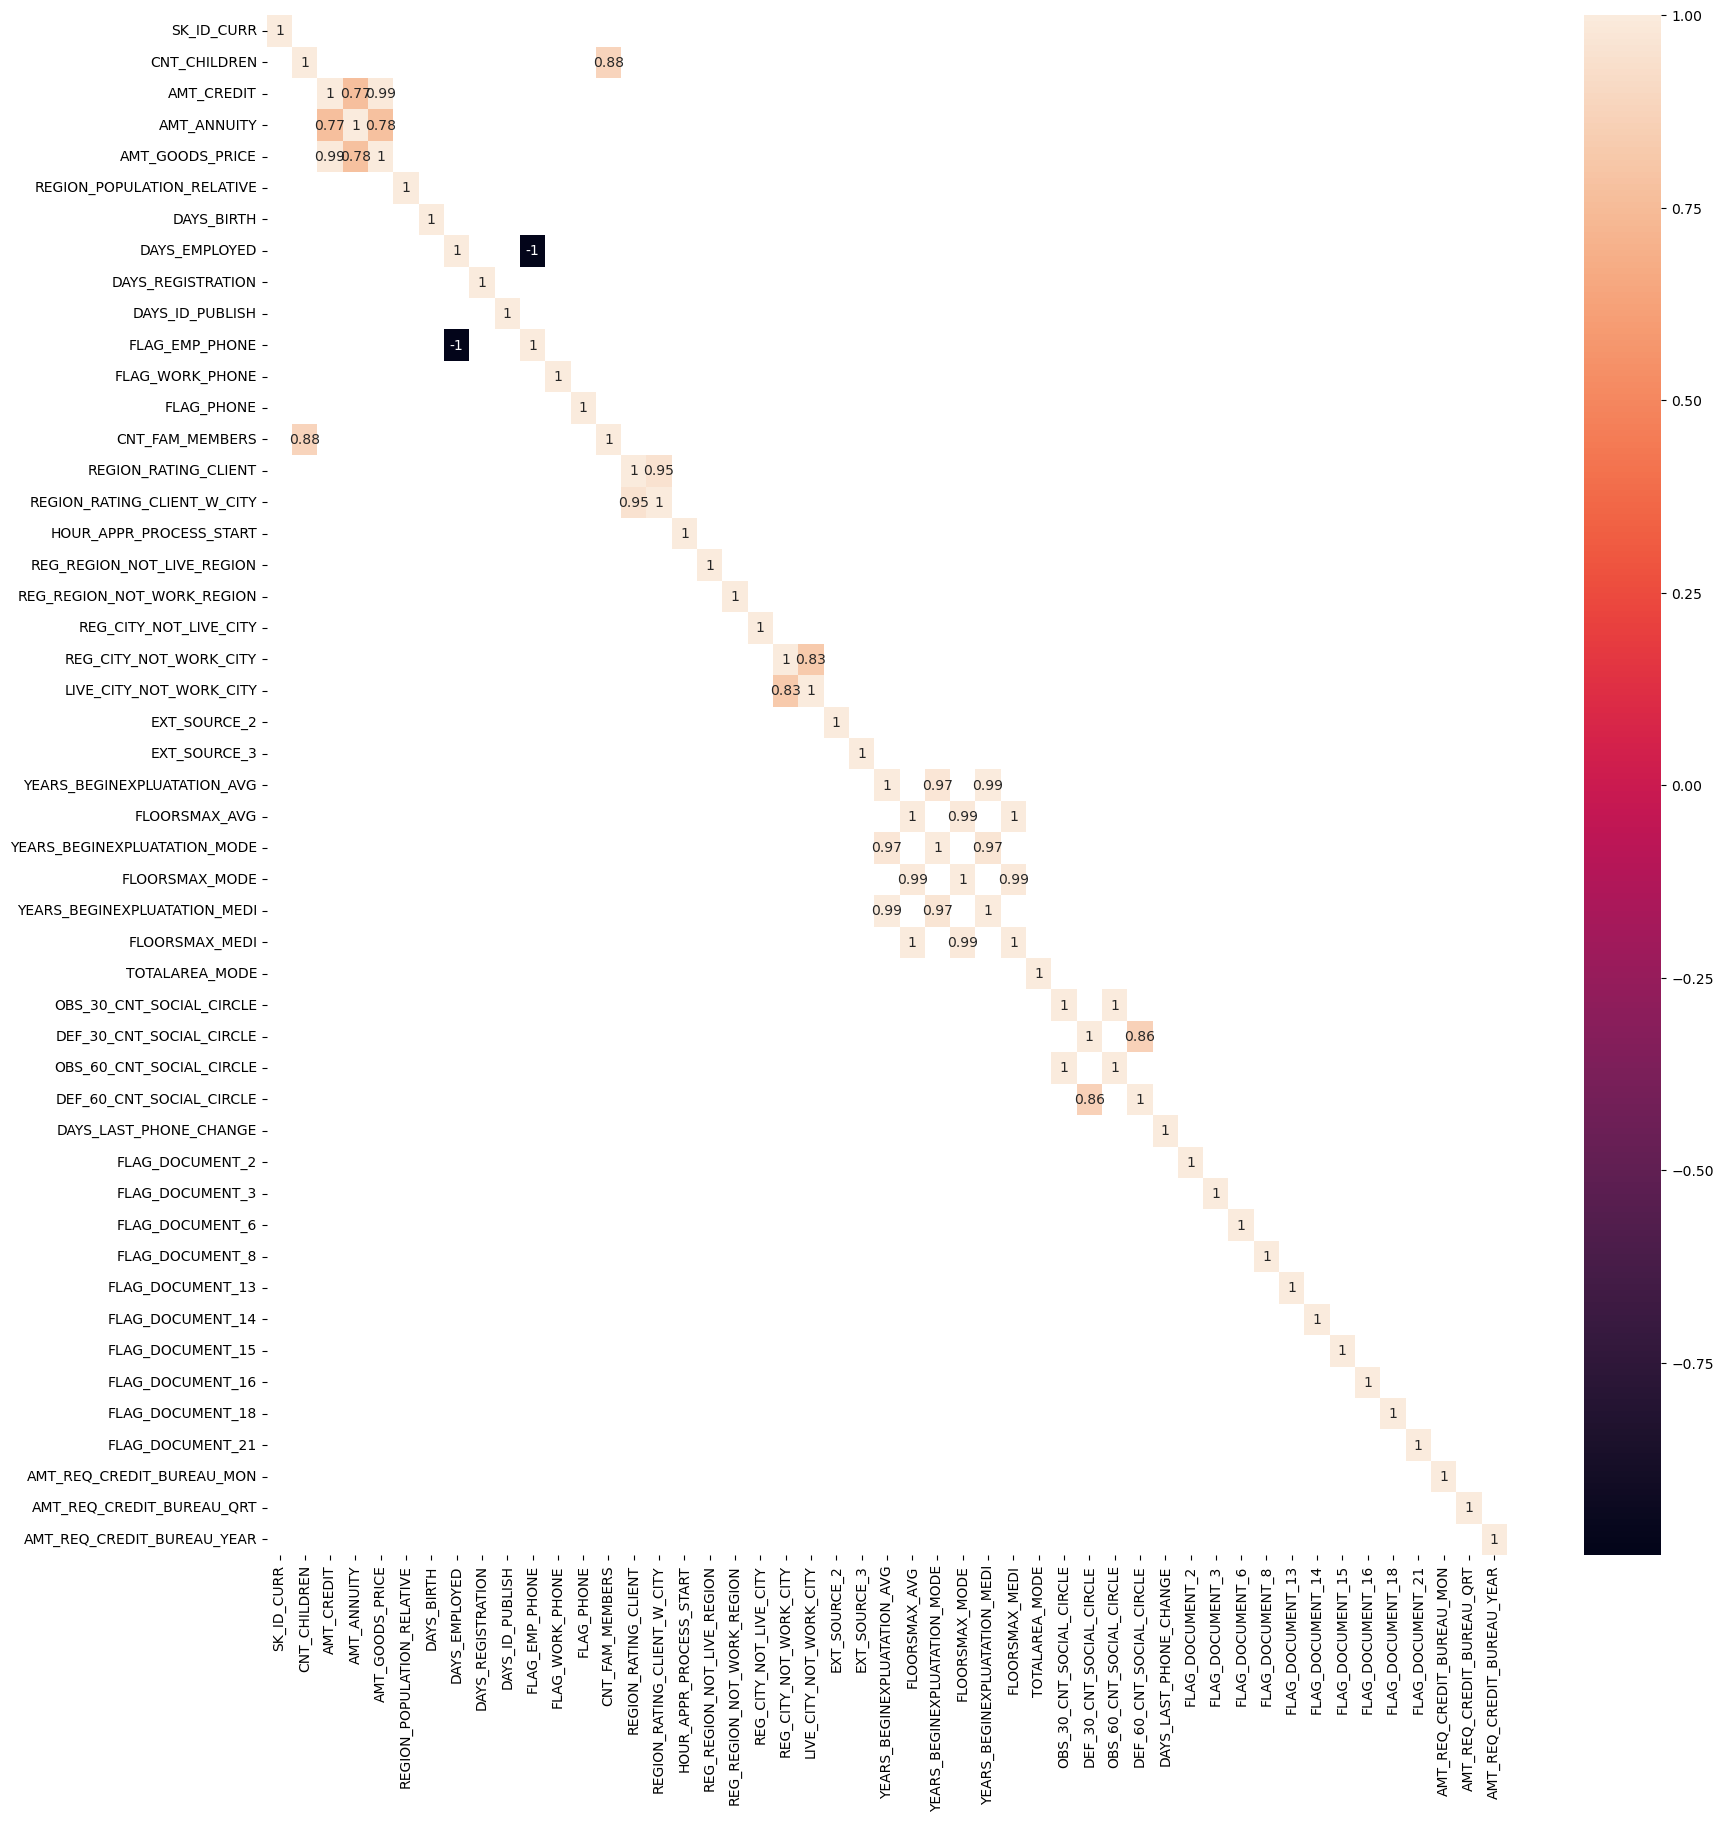

In [100]:
#select only correlation < 0.7
#Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated
#for simplicity's sake & avoid models to overfit
corr = x_train[temp_num_cols].corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, mask=(abs(corr)<=0.7))

In [101]:
#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype = bool), k=1))

In [102]:
selected_col = [col for col in mask.columns if any (mask[col] < 0.7)]
selected_col

['CNT_CHILDREN',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DO

In [103]:
len(selected_col)

48

In [104]:
num_unique = x_train[selected_col].nunique()
num_unique

CNT_CHILDREN                        14
AMT_CREDIT                        5289
AMT_ANNUITY                      13108
AMT_GOODS_PRICE                    889
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17412
DAYS_EMPLOYED                    12057
DAYS_REGISTRATION                15417
DAYS_ID_PUBLISH                   6144
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_PHONE                           2
CNT_FAM_MEMBERS                     16
REGION_RATING_CLIENT                 3
REGION_RATING_CLIENT_W_CITY          3
HOUR_APPR_PROCESS_START             24
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
EXT_SOURCE_2                    108834
EXT_SOURCE_3                       806
YEARS_BEGINEXPLUATATION_AVG        270
FLOORSMAX_AVG                      382
YEARS_BEGINEXPLUATATION_M

In [105]:
df_num_unique= pd.DataFrame(data=num_unique).reset_index()
df_num_unique.rename(columns={0:'unique'}, inplace=True)
df_num_unique

,index,unique
0,CNT_CHILDREN,14
1,AMT_CREDIT,5289
2,AMT_ANNUITY,13108
3,AMT_GOODS_PRICE,889
4,REGION_POPULATION_RELATIVE,81
5,DAYS_BIRTH,17412
6,DAYS_EMPLOYED,12057
7,DAYS_REGISTRATION,15417
8,DAYS_ID_PUBLISH,6144
9,FLAG_EMP_PHONE,2


In [106]:
select_num_unique = df_num_unique[df_num_unique['unique']>2]
select_num_unique

,index,unique
0,CNT_CHILDREN,14
1,AMT_CREDIT,5289
2,AMT_ANNUITY,13108
3,AMT_GOODS_PRICE,889
4,REGION_POPULATION_RELATIVE,81
5,DAYS_BIRTH,17412
6,DAYS_EMPLOYED,12057
7,DAYS_REGISTRATION,15417
8,DAYS_ID_PUBLISH,6144
12,CNT_FAM_MEMBERS,16


In [107]:
select_num_unique.shape

(30, 2)

In [108]:
list_select_num_unique = select_num_unique['index'].tolist()

In [109]:
list_select_num_unique

['CNT_CHILDREN',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [110]:
#drop some value that have same meaning
drop_value = ['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [111]:
select_num_final = [value for value in list_select_num_unique if value not in drop_value]

In [112]:
select_num_final

['CNT_CHILDREN',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

In [113]:
len(select_num_final)

11

In [114]:
#combine selected categorical & numerical
selected_col = selected_cat_col + select_num_final

In [115]:
x_trains = x_train[selected_col]
x_tests = x_test[selected_col]

In [116]:
#check if have missing value
x_trains.isnull().sum()

FLAG_OWN_CAR                   0
CODE_GENDER                    0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_INCOME_TYPE               0
CNT_CHILDREN                   0
AMT_CREDIT                     0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
REGION_RATING_CLIENT_W_CITY    0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
DAYS_LAST_PHONE_CHANGE         0
dtype: int64

In [117]:
#check if have missing value
x_tests.isnull().sum()

FLAG_OWN_CAR                   0
CODE_GENDER                    0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_INCOME_TYPE               0
CNT_CHILDREN                   0
AMT_CREDIT                     0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
REGION_RATING_CLIENT_W_CITY    0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
DAYS_LAST_PHONE_CHANGE         0
dtype: int64

## Feature Encoding

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

### One Hot Encoding
- **One-Hot encoding** technique is used when the features are nominal(do not have any order). 
- In one hot encoding, for every categorical feature, a new variable is created. 
- Categorical features are mapped with a binary variable containing either 0 or 1. 
- Here, 0 represents the absence, and 1 represents the presence of that category.
- These newly created binary features are known as **Dummy variables.**

In [118]:
#pd.get_dummies is used for one-hot encoding categorical variables.
def create_dummy(df, col):
    dummy = pd.get_dummies(df[col], prefix_sep = ':')
    df = pd.concat([df, dummy], axis=1)
    return df

In [119]:
#create dummy for categorical
x_trains = create_dummy(x_trains, selected_cat_col)
x_tests = create_dummy(x_tests, selected_cat_col)

In [120]:
x_trains.head()

,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_CAR:N,FLAG_OWN_CAR:Y,CODE_GENDER:F,CODE_GENDER:M,CODE_GENDER:XNA,NAME_EDUCATION_TYPE:Academic degree,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_FAMILY_STATUS:Civil marriage,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:Separated,NAME_FAMILY_STATUS:Single / not married,NAME_FAMILY_STATUS:Unknown,NAME_FAMILY_STATUS:Widow,NAME_INCOME_TYPE:Businessman,NAME_INCOME_TYPE:Commercial associate,NAME_INCOME_TYPE:Pensioner,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Student,NAME_INCOME_TYPE:Unemployed,NAME_INCOME_TYPE:Working
246542,N,F,Secondary / secondary special,Married,Pensioner,0,127350.0,0.011703,-19980,365243,-7521.0,-3270,2,0.391577,0.413597,-1591.0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
166649,Y,F,Higher education,Married,Commercial associate,0,1227901.5,0.072508,-16598,-298,-7925.0,-129,1,0.707909,0.633032,-856.0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
213816,Y,M,Secondary / secondary special,Separated,Commercial associate,0,1215000.0,0.019101,-21515,-2174,-629.0,-4028,2,0.667288,0.466864,-650.0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
255236,N,F,Higher education,Single / not married,Working,0,450000.0,0.072508,-13342,-5943,-7252.0,-916,1,0.708474,0.535276,-3.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
254621,Y,M,Secondary / secondary special,Single / not married,Commercial associate,0,545040.0,0.003122,-15974,-1130,-217.0,-568,3,0.595523,0.448962,-853.0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


## Feature Engineering with Weight of Evidence (WOE) and Information Value (IV)
**Weight of evidence (WOE)** and **information value (IV)** evolved from the same logistic regression technique. **Logistic regression** is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. WOE and IV have been used as a benchmark to screen variables in the credit risk modeling projects such as probability of default

**Weight of evidence (WOE)** generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan.  

<img src="./image/woe.png" alt="woe" width = "250"/> 

- Distribution of Goods - % of Good Customers in a particular group
- Distribution of Bads - % of Bad Customers in a particular group
- ln - Natural Log  

1. Positive WOE means Distribution of Goods > Distribution of Bads
2. Negative WOE means Distribution of Goods < Distribution of Bads  
Notes : Log of a number > 1 means positive value. If less than 1, it means negative value.

**Information value (IV)** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance.  
<img src="./image/iv.png" alt="iv" width = "300"/>   
<img src="./image/rule_iv.png" alt="rule" width = "300"/>

In [121]:
#copy dataset for preprocessing
x_trains_prep = x_trains.copy()
y_train_prep = y_train.copy()
x_tests_prep = x_tests.copy()
y_test_prep = y_test.copy()

### Categorical Feature

#### FLAG_OWN_CAR

In [122]:
x_trains_prep.head()

,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_CAR:N,FLAG_OWN_CAR:Y,CODE_GENDER:F,CODE_GENDER:M,CODE_GENDER:XNA,NAME_EDUCATION_TYPE:Academic degree,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_FAMILY_STATUS:Civil marriage,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:Separated,NAME_FAMILY_STATUS:Single / not married,NAME_FAMILY_STATUS:Unknown,NAME_FAMILY_STATUS:Widow,NAME_INCOME_TYPE:Businessman,NAME_INCOME_TYPE:Commercial associate,NAME_INCOME_TYPE:Pensioner,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Student,NAME_INCOME_TYPE:Unemployed,NAME_INCOME_TYPE:Working
246542,N,F,Secondary / secondary special,Married,Pensioner,0,127350.0,0.011703,-19980,365243,-7521.0,-3270,2,0.391577,0.413597,-1591.0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
166649,Y,F,Higher education,Married,Commercial associate,0,1227901.5,0.072508,-16598,-298,-7925.0,-129,1,0.707909,0.633032,-856.0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
213816,Y,M,Secondary / secondary special,Separated,Commercial associate,0,1215000.0,0.019101,-21515,-2174,-629.0,-4028,2,0.667288,0.466864,-650.0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
255236,N,F,Higher education,Single / not married,Working,0,450000.0,0.072508,-13342,-5943,-7252.0,-916,1,0.708474,0.535276,-3.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
254621,Y,M,Secondary / secondary special,Single / not married,Commercial associate,0,545040.0,0.003122,-15974,-1130,-217.0,-568,3,0.595523,0.448962,-853.0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [123]:
#join category with target
df = pd.concat([x_trains_prep['FLAG_OWN_CAR'], y_train_prep], axis=1)
df.head()

,FLAG_OWN_CAR,TARGET
246542,N,1
166649,Y,1
213816,Y,0
255236,N,1
254621,Y,1


In [124]:
#grouby target
df2 = df.groupby('FLAG_OWN_CAR', as_index=False).agg(num_observation = ('TARGET','count'), num_good = ('TARGET','sum'))
df2

,FLAG_OWN_CAR,num_observation,num_good
0,N,162453,148612
1,Y,83555,77536


In [125]:
#add number of bad loan
df2['num_bad'] = df2['num_observation'] - df2['num_good']
df2

,FLAG_OWN_CAR,num_observation,num_good,num_bad
0,N,162453,148612,13841
1,Y,83555,77536,6019


In [126]:
#distribution of num_observation
df2['total_distr'] = df2['num_observation']/df2['num_observation'].sum()

#distribution of num_good
df2['good_distr'] = df2['num_good']/df2['num_good'].sum()

#distribution of num_bad
df2['bad_distr'] = df2['num_bad']/df2['num_bad'].sum()

#WOE
df2['WOE'] = np.log(df2['good_distr']/df2['bad_distr'])

#IV
df2['IV'] = (df2['good_distr'] - df2['bad_distr']) * df2['WOE'] 
df2['IV'] = df2['IV'].sum()

In [127]:
df2

,FLAG_OWN_CAR,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,N,162453,148612,13841,0.660357,0.657145,0.696928,-0.058778,0.007245
1,Y,83555,77536,6019,0.339643,0.342855,0.303072,0.123339,0.007245


**Insight :**   
*'FLAG_OWN_CAR'* is Not useful for prediction (IV < 0.02). So it will be dropped.

In [128]:
#function for automation on WOE & IV
def woe(x_df, feature_name, y_df):
    #join category with target
    df = pd.concat([x_df[feature_name], y_df], axis=1)
    
    #grouby target
    df2 = df.groupby(feature_name, as_index=False).agg(num_observation = ('TARGET','count'), num_good = ('TARGET','sum'))
    
    #add number of bad loan
    df2['num_bad'] = df2['num_observation'] - df2['num_good']
    
    #distribution of num_observation
    df2['total_distr'] = df2['num_observation']/df2['num_observation'].sum()
    
    #distribution of num_good
    df2['good_distr'] = df2['num_good']/df2['num_good'].sum()

    #distribution of num_bad
    df2['bad_distr'] = df2['num_bad']/df2['num_bad'].sum()

    #WOE
    df2['WOE'] = np.log(df2['good_distr']/df2['bad_distr'])

    #IV
    df2['IV'] = (df2['good_distr'] - df2['bad_distr']) * df2['WOE'] 
    df2['IV'] = df2['IV'].sum()
    
    return df2    

#### Code Gender

In [129]:
woe(x_trains_prep, 'CODE_GENDER', y_train_prep)

,CODE_GENDER,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,F,162038,150670,11368,0.658670,0.666245,0.572407,0.151808,inf
1,M,83968,75476,8492,0.341322,0.333746,0.427593,-0.247792,inf
2,XNA,2,2,0,0.000008,0.000009,0.000000,inf,inf


*) Problem with XNA, alocate XNA to female gender because it was the most num_observation

In [130]:
#change XNA to female
x_trains_prep['CODE_GENDER'] = x_trains_prep['CODE_GENDER'].apply(lambda x : 'F' if x == 'XNA' else x)

In [131]:
woe(x_trains_prep, 'CODE_GENDER', y_train_prep)

,CODE_GENDER,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,F,162040,150672,11368,0.658678,0.666254,0.572407,0.151821,0.037502
1,M,83968,75476,8492,0.341322,0.333746,0.427593,-0.247792,0.037502


**Insight :**   
*'CODE_GENDER'* is Weak predicive power (0.02< IV < 0.1)

#### NAME_EDUCATION_TYPE

In [132]:
woe(x_trains_prep, 'NAME_EDUCATION_TYPE', y_train_prep)

,NAME_EDUCATION_TYPE,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,Academic degree,124,121,3,0.000504,0.000535,0.000151,1.264696,0.048773
1,Higher education,59829,56594,3235,0.243199,0.250252,0.162890,0.429392,0.048773
2,Incomplete higher,8260,7547,713,0.033576,0.033372,0.035901,-0.073058,0.048773
3,Lower secondary,3030,2687,343,0.012317,0.011882,0.017271,-0.374032,0.048773
4,Secondary / secondary special,174765,159199,15566,0.710404,0.703959,0.783787,-0.107416,0.048773


**Insight :**   
*'NAME_EDUCATION_TYPE'* is Weak predicive power (0.02< IV < 0.1)

#### NAME_FAMILY_STATUS

In [133]:
woe(x_trains_prep, 'NAME_FAMILY_STATUS', y_train_prep)

,NAME_FAMILY_STATUS,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,Civil marriage,23864,21483,2381,0.097005,0.094995,0.119889,-0.232741,inf
1,Married,157064,145177,11887,0.638451,0.641956,0.598540,0.070026,inf
2,Separated,15853,14568,1285,0.064441,0.064418,0.064703,-0.004413,inf
3,Single / not married,36380,32817,3563,0.147881,0.145113,0.179406,-0.212138,inf
4,Unknown,1,1,0,0.000004,0.000004,0.000000,inf,inf
5,Widow,12846,12102,744,0.052218,0.053514,0.037462,0.356603,inf


*) Problem with Unknown	, alocate Unknown to Married because it was the most num_observation

In [134]:
#change Unknown to Married
x_trains_prep['NAME_FAMILY_STATUS'] = x_trains_prep['NAME_FAMILY_STATUS'].apply(lambda x : 'Married' if x == 'Unknown' else x)

In [135]:
woe(x_trains_prep, 'NAME_FAMILY_STATUS', y_train_prep)

,NAME_FAMILY_STATUS,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,Civil marriage,23864,21483,2381,0.097005,0.094995,0.119889,-0.232741,0.021835
1,Married,157065,145178,11887,0.638455,0.641960,0.598540,0.070033,0.021835
2,Separated,15853,14568,1285,0.064441,0.064418,0.064703,-0.004413,0.021835
3,Single / not married,36380,32817,3563,0.147881,0.145113,0.179406,-0.212138,0.021835
4,Widow,12846,12102,744,0.052218,0.053514,0.037462,0.356603,0.021835


**Insight :**   
*'NAME_FAMILY_STATUS'* is Weak predicive power (0.02< IV < 0.1)

#### NAME_INCOME_TYPE

In [136]:
woe(x_trains_prep, 'NAME_INCOME_TYPE', y_train_prep)

,NAME_INCOME_TYPE,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,Businessman,9,9,0,0.000037,0.000040,0.000000,inf,inf
1,Commercial associate,57266,52972,4294,0.232781,0.234236,0.216213,0.080063,inf
2,Pensioner,44190,41800,2390,0.179628,0.184835,0.120342,0.429121,inf
3,State servant,17505,16518,987,0.071156,0.073041,0.049698,0.385054,inf
4,Student,12,12,0,0.000049,0.000053,0.000000,inf,inf
5,Unemployed,18,13,5,0.000073,0.000057,0.000252,-1.476971,inf
6,Working,127008,114824,12184,0.516276,0.507738,0.613494,-0.189205,inf


*) Problem with Businessman & Student, alocate them to Working because it was the most num_observation

In [137]:
#change Businessman & Student to Working
x_trains_prep['NAME_INCOME_TYPE'] = x_trains_prep['NAME_INCOME_TYPE'].apply(lambda x : 'Working' if x == 'Businessman' or x =='Student' else x)

In [138]:
woe(x_trains_prep, 'NAME_INCOME_TYPE', y_train_prep)

,NAME_INCOME_TYPE,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,Commercial associate,57266,52972,4294,0.232781,0.234236,0.216213,0.080063,0.058366
1,Pensioner,44190,41800,2390,0.179628,0.184835,0.120342,0.429121,0.058366
2,State servant,17505,16518,987,0.071156,0.073041,0.049698,0.385054,0.058366
3,Unemployed,18,13,5,0.000073,0.000057,0.000252,-1.476971,0.058366
4,Working,127029,114845,12184,0.516361,0.507831,0.613494,-0.189022,0.058366


**Insight :**   
*'NAME_INCOME_TYPE'* is Weak predicive power (0.02< IV < 0.1)

### Numerical Feature

In [139]:
#display numerical feature
x_trains_prep[select_num_final].nunique().sort_values()

REGION_RATING_CLIENT_W_CITY         3
CNT_CHILDREN                       14
REGION_POPULATION_RELATIVE         81
EXT_SOURCE_3                      806
DAYS_LAST_PHONE_CHANGE           3737
AMT_CREDIT                       5289
DAYS_ID_PUBLISH                  6144
DAYS_EMPLOYED                   12057
DAYS_REGISTRATION               15417
DAYS_BIRTH                      17412
EXT_SOURCE_2                   108834
dtype: int64

#### REGION_RATING_CLIENT_W_CITY

In [140]:
woe(x_trains_prep, 'REGION_RATING_CLIENT_W_CITY', y_train_prep)

,REGION_RATING_CLIENT_W_CITY,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,1,27392,26071,1321,0.111346,0.115283,0.066516,0.549953,0.051268
1,2,183539,168992,14547,0.746069,0.747263,0.732477,0.019985,0.051268
2,3,35077,31085,3992,0.142585,0.137454,0.201007,-0.380049,0.051268


**Insight :**   
*'REGION_RATING_CLIENT_W_CITY'* is Weak predicive power (0.02< IV < 0.1)

#### CNT_CHILDREN

In [141]:
woe(x_trains_prep, 'CNT_CHILDREN', y_train_prep)

,CNT_CHILDREN,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,0,172178,158937,13241,0.699888,0.702801,0.666717,0.052708,inf
1,1,49013,44591,4422,0.199233,0.197176,0.222659,-0.121542,inf
2,2,21440,19567,1873,0.087152,0.086523,0.094310,-0.086179,inf
3,3,2940,2673,267,0.011951,0.011820,0.013444,-0.128774,inf
4,4,327,284,43,0.001329,0.001256,0.002165,-0.544708,inf
5,5,75,69,6,0.000305,0.000305,0.000302,0.009865,inf
6,6,18,12,6,0.000073,0.000053,0.000302,-1.739335,inf
7,7,6,6,0,0.000024,0.000027,0.000000,inf,inf
8,8,2,2,0,0.000008,0.000009,0.000000,inf,inf
9,9,1,0,1,0.000004,0.000000,0.000050,-inf,inf


*) Problem with children > 6, alocate them to 6

In [142]:
#change children > 6 to 6
x_trains_prep['CNT_CHILDREN'] = x_trains_prep['CNT_CHILDREN'].apply(lambda x : 6 if x in(7,8,9,10,11,14,19) else x)

In [143]:
woe(x_trains_prep, 'CNT_CHILDREN', y_train_prep)

,CNT_CHILDREN,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,0,172178,158937,13241,0.699888,0.702801,0.666717,0.052708,0.006719
1,1,49013,44591,4422,0.199233,0.197176,0.222659,-0.121542,0.006719
2,2,21440,19567,1873,0.087152,0.086523,0.094310,-0.086179,0.006719
3,3,2940,2673,267,0.011951,0.011820,0.013444,-0.128774,0.006719
4,4,327,284,43,0.001329,0.001256,0.002165,-0.544708,0.006719
5,5,75,69,6,0.000305,0.000305,0.000302,0.009865,0.006719
6,6,35,27,8,0.000142,0.000119,0.000403,-1.216087,0.006719


**Insight :**   
*'CNT_CHILDREN'* is Not useful for prediction (IV < 0.02). So it will be dropped.

#### REGION_POPULATION_RELATIVE

In [144]:
#Because there were too much unique value, so we're gonna divided into some bins
x_trains_prep['REGION_POPULATION_RELATIVE_segment'] = pd.cut(x_trains_prep['REGION_POPULATION_RELATIVE'],bins= 5)

woe(x_trains_prep, 'REGION_POPULATION_RELATIVE_segment', y_train_prep)

,REGION_POPULATION_RELATIVE_segment,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,"(0.000218, 0.0147]",90449,82858,7591,0.367667,0.366388,0.382226,-0.042317,0.026641
1,"(0.0147, 0.0292]",100843,92053,8790,0.409918,0.407048,0.442598,-0.083732,0.026641
2,"(0.0292, 0.0436]",37197,34520,2677,0.151202,0.152643,0.134794,0.124360,0.026641
3,"(0.0436, 0.0581]",10829,10299,530,0.044019,0.045541,0.026687,0.534443,0.026641
4,"(0.0581, 0.0725]",6690,6418,272,0.027194,0.028380,0.013696,0.728578,0.026641


**Insight :**   
*'REGION_POPULATION_RELATIVE'* is Weak predicive power (0.02< IV < 0.1)

#### EXT_SOURCE_3

In [145]:
#Because there were too much unique value, so we're gonna divided into some bins
x_trains_prep['EXT_SOURCE_3_segment'] = pd.cut(x_trains_prep['EXT_SOURCE_3'],bins= 10)

woe(x_trains_prep, 'EXT_SOURCE_3_segment', y_train_prep)

,EXT_SOURCE_3_segment,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,"(-0.000368, 0.0901]",3615,2675,940,0.014695,0.011829,0.047331,-1.386657,0.320361
1,"(0.0901, 0.18]",9251,7381,1870,0.037604,0.032638,0.094159,-1.059511,0.320361
2,"(0.18, 0.269]",13989,11863,2126,0.056864,0.052457,0.107049,-0.713300,0.320361
3,"(0.269, 0.359]",19288,17139,2149,0.078404,0.075787,0.108207,-0.356128,0.320361
4,"(0.359, 0.448]",24314,22190,2124,0.098834,0.098122,0.106949,-0.086141,0.320361
5,"(0.448, 0.538]",77699,71184,6515,0.315839,0.314767,0.328046,-0.041321,0.320361
6,"(0.538, 0.627]",32915,31205,1710,0.133796,0.137985,0.086103,0.471603,0.320361
7,"(0.627, 0.717]",34333,32894,1439,0.139561,0.145453,0.072457,0.696860,0.320361
8,"(0.717, 0.806]",24437,23638,799,0.099334,0.104524,0.040232,0.954768,0.320361
9,"(0.806, 0.896]",6167,5979,188,0.025068,0.026438,0.009466,1.027085,0.320361


**Insight :**   
*'EXT_SOURCE_3'* is Strong predicive power (0.3< IV < 0.5)

#### DAYS_LAST_PHONE_CHANGE

In [146]:
#convert day to year
#np.floor rounds down each element to the nearest integer
x_trains_prep['YEAR_LAST_PHONE_CHANGE'] = -np.floor((x_trains_prep['DAYS_LAST_PHONE_CHANGE']/365))

In [147]:
#Because there were too much unique value, so we're gonna divided into some bins
x_trains_prep['YEAR_LAST_PHONE_CHANGE_segment'] = pd.cut(x_trains_prep['YEAR_LAST_PHONE_CHANGE'],bins= 6)

woe(x_trains_prep, 'YEAR_LAST_PHONE_CHANGE_segment', y_train_prep)

,YEAR_LAST_PHONE_CHANGE_segment,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,"(-0.012, 2.0]",120240,108831,11409,0.488765,0.481238,0.574471,-0.177088,0.046062
1,"(2.0, 4.0]",54154,49975,4179,0.220131,0.220984,0.210423,0.048969,0.046062
2,"(4.0, 6.0]",48138,45116,3022,0.195677,0.199498,0.152165,0.270836,0.046062
3,"(6.0, 8.0]",18782,17747,1035,0.076347,0.078475,0.052115,0.409333,0.046062
4,"(8.0, 10.0]",4515,4308,207,0.018353,0.019049,0.010423,0.603028,0.046062
5,"(10.0, 12.0]",179,171,8,0.000728,0.000756,0.000403,0.629740,0.046062


**Insight :**   
*'DAYS_LAST_PHONE_CHANGE'* is Weak predicive power (0.02< IV < 0.1)

#### AMT_CREDIT

In [148]:
#Because there were too much unique value, so we're gonna divided into some bins
x_trains_prep['AMT_CREDIT_segment'] = pd.cut(x_trains_prep['AMT_CREDIT'],bins= 5)

woe(x_trains_prep, 'AMT_CREDIT_segment', y_train_prep)

,AMT_CREDIT_segment,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,"(40995.0, 846000.0]",190293,173858,16435,0.773524,0.768780,0.827543,-0.073656,0.024318
1,"(846000.0, 1647000.0]",50714,47498,3216,0.206148,0.210031,0.161934,0.260067,0.024318
2,"(1647000.0, 2448000.0]",4666,4470,196,0.018967,0.019766,0.009869,0.694547,0.024318
3,"(2448000.0, 3249000.0]",317,305,12,0.001289,0.001349,0.000604,0.802923,0.024318
4,"(3249000.0, 4050000.0]",18,17,1,0.000073,0.000075,0.000050,0.400731,0.024318


**Insight :**   
*'AMT_CREDIT'* is Weak predicive power (0.02< IV < 0.1)

#### DAYS_ID_PUBLISH

In [149]:
#convert day to year
#np.floor rounds down each element to the nearest integer
x_trains_prep['YEAR_ID_PUBLISH'] = -np.floor((x_trains_prep['DAYS_ID_PUBLISH']/365))

In [150]:
#Because there were too much unique value, so we're gonna divided into some bins
x_trains_prep['YEAR_ID_PUBLISH_segment'] = pd.cut(x_trains_prep['YEAR_ID_PUBLISH'],bins= 5)

woe(x_trains_prep, 'YEAR_ID_PUBLISH_segment', y_train_prep)

,YEAR_ID_PUBLISH_segment,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,"(-0.02, 4.0]",52241,46992,5249,0.212355,0.207793,0.264300,-0.240542,0.035895
1,"(4.0, 8.0]",57096,52002,5094,0.232090,0.229947,0.256495,-0.109263,0.035895
2,"(8.0, 12.0]",82861,76633,6228,0.336822,0.338862,0.313595,0.077491,0.035895
3,"(12.0, 16.0]",53105,49850,3255,0.215867,0.220431,0.163897,0.296344,0.035895
4,"(16.0, 20.0]",705,671,34,0.002866,0.002967,0.001712,0.549927,0.035895


**Insight :**   
*'DAYS_ID_PUBLISH'* is Weak predicive power (0.02< IV < 0.1)

#### DAYS_EMPLOYED

In [151]:
#convert day to year
#np.floor rounds down each element to the nearest integer
x_trains_prep['YEAR_EMPLOYED'] = -np.floor((x_trains_prep['DAYS_EMPLOYED']/365))

In [152]:
#Because there were too much unique value, so we're gonna divided into some bins
x_trains_prep['YEAR_EMPLOYED_segment'] = pd.cut(x_trains_prep['YEAR_EMPLOYED'],bins= 2)

woe(x_trains_prep, 'YEAR_EMPLOYED_segment', y_train_prep)

,YEAR_EMPLOYED_segment,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,"(-1001.049, -475.5]",44200,41805,2395,0.179669,0.184857,0.120594,0.427151,0.032326
1,"(-475.5, 49.0]",201808,184343,17465,0.820331,0.815143,0.879406,-0.075883,0.032326


**Insight :**   
*'DAYS_EMPLOYED'* is Weak predicive power (0.02< IV < 0.1)

#### DAYS_REGISTRATION

In [153]:
#convert day to year
#np.floor rounds down each element to the nearest integer
x_trains_prep['YEAR_REGISTRATION'] = -np.floor((x_trains_prep['DAYS_REGISTRATION']/365))

In [154]:
#Because there were too much unique value, so we're gonna divided into some bins
x_trains_prep['YEAR_REGISTRATION_segment'] = pd.cut(x_trains_prep['YEAR_REGISTRATION'],bins= 4)

woe(x_trains_prep, 'YEAR_REGISTRATION_segment', y_train_prep)

,YEAR_REGISTRATION_segment,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,"(-0.068, 17.0]",161752,147509,14243,0.657507,0.652268,0.717170,-0.094858,0.021206
1,"(17.0, 34.0]",76957,71726,5231,0.312823,0.317164,0.263394,0.185769,0.021206
2,"(34.0, 51.0]",7246,6862,384,0.029454,0.030343,0.019335,0.450630,0.021206
3,"(51.0, 68.0]",53,51,2,0.000215,0.000226,0.000101,0.806196,0.021206


**Insight :**   
*'DAYS_REGISTRATION'* is Weak predicive power (0.02< IV < 0.1)

#### DAYS_BIRTH

In [155]:
#convert day to year
#np.floor rounds down each element to the nearest integer
x_trains_prep['YEAR_BIRTH'] = -np.floor((x_trains_prep['DAYS_BIRTH']/365))

In [156]:
#Because there were too much unique value, so we're gonna divided into some bins
x_trains_prep['YEAR_BIRTH_segment'] = pd.cut(x_trains_prep['YEAR_BIRTH'],bins= 5)

woe(x_trains_prep, 'YEAR_BIRTH_segment', y_train_prep)

,YEAR_BIRTH_segment,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,"(20.951, 30.8]",35997,31868,4129,0.146325,0.140917,0.207905,-0.388915,0.080286
1,"(30.8, 40.6]",66020,59711,6309,0.268365,0.264035,0.317674,-0.184943,0.080286
2,"(40.6, 50.4]",61326,56619,4707,0.249285,0.250363,0.237009,0.054812,0.080286
3,"(50.4, 60.2]",54357,51027,3330,0.220956,0.225635,0.167674,0.296901,0.080286
4,"(60.2, 70.0]",28308,26923,1385,0.115069,0.119050,0.069738,0.534799,0.080286


**Insight :**   
*'DAYS_BIRTH'* is Weak predicive power (0.02< IV < 0.1)

#### EXT_SOURCE_2

In [157]:
#Because there were too much unique value, so we're gonna divided into some bins
x_trains_prep['EXT_SOURCE_2_segment'] = pd.cut(x_trains_prep['EXT_SOURCE_2'],bins= 10)

woe(x_trains_prep, 'EXT_SOURCE_2_segment', y_train_prep)

,EXT_SOURCE_2_segment,num_observation,num_good,num_bad,total_distr,good_distr,bad_distr,WOE,IV
0,"(-0.000855, 0.0855]",7616,5775,1841,0.030958,0.025536,0.092699,-1.289253,0.317368
1,"(0.0855, 0.171]",10347,8599,1748,0.042060,0.038024,0.088016,-0.839308,0.317368
2,"(0.171, 0.256]",13317,11477,1840,0.054132,0.050750,0.092649,-0.601903,0.317368
3,"(0.256, 0.342]",18373,16274,2099,0.074685,0.071962,0.105690,-0.384374,0.317368
4,"(0.342, 0.427]",20680,18595,2085,0.084062,0.082225,0.104985,-0.244358,0.317368
5,"(0.427, 0.513]",28298,25915,2383,0.115029,0.114593,0.119990,-0.046020,0.317368
6,"(0.513, 0.598]",43229,40136,3093,0.175722,0.177477,0.155740,0.130650,0.317368
7,"(0.598, 0.684]",56324,53224,3100,0.228952,0.235350,0.156093,0.410625,0.317368
8,"(0.684, 0.769]",42660,41103,1557,0.173409,0.181753,0.078399,0.840838,0.317368
9,"(0.769, 0.855]",5164,5050,114,0.020991,0.022331,0.005740,1.358463,0.317368


**Insight :**   
*'EXT_SOURCE_2'* is Strong predicive power (0.3< IV < 0.5)

#### Drop Feature No Needed
There are feature that gonna be dropped because :
- Information Value (IV) < 0.02, The variable is Not useful for prediction
- Information Value (IV) > 0.5, The variable is Suspicious Predictive Power

In [158]:
#drop list
drop_list = ['FLAG_OWN_CAR', #categorical
            'CNT_CHILDREN'] #numerical

In [159]:
select_num_woe = [value for value in select_num_final if value not in drop_list]

In [160]:
select_num_woe

['AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

In [161]:
#change days to year
select_num_woe_list = ['AMT_CREDIT',
     'REGION_POPULATION_RELATIVE',
     'YEAR_BIRTH_segment',
     'YEAR_EMPLOYED_segment',
     'YEAR_REGISTRATION_segment',
     'YEAR_ID_PUBLISH_segment',
     'REGION_RATING_CLIENT_W_CITY',
     'EXT_SOURCE_2',
     'EXT_SOURCE_3',
     'YEAR_LAST_PHONE_CHANGE_segment']

In [162]:
select_cat_woe_list = [value for value in selected_cat_col if value not in drop_list]

In [163]:
select_cat_woe_list

['CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_INCOME_TYPE']

In [164]:
print(f'Before Feature Engineering Using WOE and IV, there are {len(selected_cat_col) + len(select_num_final)} columns')
print(f'After Feature Engineering Using WOE and IV, there are {len(select_cat_woe_list) + len(select_num_woe_list)} columns')

Before Feature Engineering Using WOE and IV, there are 16 columns
After Feature Engineering Using WOE and IV, there are 14 columns


## WoE Binning / Reengineering
- Weight of Evidence (WoE) binning or reengineering is a technique used in the field of credit scoring and risk modeling. 
- It's often employed to transform continuous variables into categorical ones, which can be more informative for predictive modeling. 
- WoE is used to encode the relationship between the independent variable and the dependent variable in a way that is suitable for logistic regression.

In [165]:
x_trains_prep.describe()

,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_CAR:N,FLAG_OWN_CAR:Y,CODE_GENDER:F,CODE_GENDER:M,CODE_GENDER:XNA,NAME_EDUCATION_TYPE:Academic degree,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_FAMILY_STATUS:Civil marriage,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:Separated,NAME_FAMILY_STATUS:Single / not married,NAME_FAMILY_STATUS:Unknown,NAME_FAMILY_STATUS:Widow,NAME_INCOME_TYPE:Businessman,NAME_INCOME_TYPE:Commercial associate,NAME_INCOME_TYPE:Pensioner,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Student,NAME_INCOME_TYPE:Unemployed,NAME_INCOME_TYPE:Working,YEAR_LAST_PHONE_CHANGE,YEAR_ID_PUBLISH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_BIRTH
count,246008.000000,2.460080e+05,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,2.460080e+05,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000
mean,0.417084,5.990095e+05,0.020859,-16029.807331,63668.147946,-4991.218237,-2993.689616,2.031239,5.143720e-01,0.515593,-963.104619,0.660357,0.339643,0.658670,0.341322,0.000008,0.000504,0.243199,0.033576,0.012317,0.710404,0.097005,0.638451,0.064441,0.147881,0.000004,0.052218,0.000037,0.232781,0.179628,0.071156,0.000049,0.000073,0.516276,3.100415,8.709327,-173.901463,14.180226,44.412856
std,0.717950,4.021147e+05,0.013827,4359.823101,141151.904111,3524.413603,1509.386678,0.502947,1.909299e-01,0.174788,827.030181,0.473589,0.473589,0.474157,0.474154,0.002851,0.022445,0.429015,0.180136,0.110295,0.453576,0.295965,0.480450,0.245537,0.354983,0.002016,0.222466,0.006048,0.422605,0.383878,0.257086,0.006984,0.008554,0.499736,2.337689,4.135008,386.655000,9.651427,11.943076
min,0.000000,4.500000e+04,0.000290,-25229.000000,-17583.000000,-24672.000000,-7197.000000,1.000000,8.173617e-08,0.000527,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-1000.000000,-0.000000,21.000000
25%,0.000000,2.700000e+05,0.010006,-19673.000000,-2762.000000,-7486.000000,-4298.000000,2.000000,3.926321e-01,0.417100,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000,6.000000,34.000000
50%,0.000000,5.146020e+05,0.018850,-15739.000000,-1213.000000,-4511.000000,-3256.000000,2.000000,5.659614e-01,0.535276,-757.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,9.000000,4.000000,13.000000,44.000000
75%,1.000000,8.086500e+05,0.028663,-12410.000000,-290.000000,-2014.000000,-1716.000000,2.000000,6.634328e-01,0.636376,-274.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,12.000000,8.000000,21.000000,54.000000
max,6.000000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,3.000000,8.549997e-01,0.896010,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [166]:
#create new categorical dummy features based on WOE & IV
class WoE_Binning(BaseEstimator, TransformerMixin):
    #Using BaseEstimator and TransformerMixin can enhance the compatibility of custom class with scikit-learn pipelines
    def __init__(self, x):
        self.x = x
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        #categorical feature
        x_new = x.loc[:, 'CODE_GENDER:M'].to_frame()
        x_new['CODE_GENDER:F_XNA'] = sum([x['CODE_GENDER:F'], x['CODE_GENDER:XNA']])
        
        x_new['NAME_EDUCATION_TYPE:Academic degree'] = x.loc[:,'NAME_EDUCATION_TYPE:Academic degree']
        x_new['NAME_EDUCATION_TYPE:Higher education'] = x.loc[:,'NAME_EDUCATION_TYPE:Higher education']
        x_new['NAME_EDUCATION_TYPE:Incomplete higher'] = x.loc[:,'NAME_EDUCATION_TYPE:Incomplete higher']
        x_new['NAME_EDUCATION_TYPE:Lower secondary'] = x.loc[:,'NAME_EDUCATION_TYPE:Lower secondary']
        x_new['NAME_EDUCATION_TYPE:Secondary / secondary special'] = x.loc[:,'NAME_EDUCATION_TYPE:Secondary / secondary special']
        
        x_new['NAME_FAMILY_STATUS:Single_Unknown'] = x['NAME_FAMILY_STATUS:Single / not married'] | x['NAME_FAMILY_STATUS:Unknown']
        x_new['NAME_FAMILY_STATUS:Civil marriage'] = x.loc[:,'NAME_FAMILY_STATUS:Civil marriage']
        x_new['NAME_FAMILY_STATUS:Married'] = x.loc[:,'NAME_FAMILY_STATUS:Married']
        x_new['NAME_FAMILY_STATUS:Separated'] = x.loc[:,'NAME_FAMILY_STATUS:Separated']
        x_new['NAME_FAMILY_STATUS:Widow'] = x.loc[:,'NAME_FAMILY_STATUS:Widow']
        
        x_new['NAME_INCOME_TYPE:Business_comm'] = x['NAME_INCOME_TYPE:Businessman'] | x['NAME_INCOME_TYPE:Commercial associate']
        x_new['NAME_INCOME_TYPE:Pensioner'] = x.loc[:,'NAME_INCOME_TYPE:Pensioner']
        x_new['NAME_INCOME_TYPE:student_unemployed'] = x['NAME_INCOME_TYPE:Student'] | x['NAME_INCOME_TYPE:Unemployed']
        x_new['NAME_INCOME_TYPE:State servant'] = x.loc[:,'NAME_INCOME_TYPE:State servant']
        x_new['NAME_INCOME_TYPE:Working'] = x.loc[:,'NAME_INCOME_TYPE:Working']
        
        #numerical feature
        x_new['AMT_CREDIT:<846000'] = np.where((x['AMT_CREDIT'] <= 846000),1,0)
        x_new['AMT_CREDIT:846000-1647000'] = np.where((x['AMT_CREDIT'] > 846000) & (x['AMT_CREDIT'] <= 1647000),1,0)
        x_new['AMT_CREDIT:1647000-2448000'] = np.where((x['AMT_CREDIT'] > 1647000) & (x['AMT_CREDIT'] <= 2448000),1,0)
        x_new['AMT_CREDIT:2448000-3249000'] = np.where((x['AMT_CREDIT'] > 2448000) & (x['AMT_CREDIT'] <= 3249000),1,0)
        x_new['AMT_CREDIT:>3249000'] = np.where((x['AMT_CREDIT'] >3249000),1,0)
        
        x_new['REGION_POPULATION_RELATIVE:<0.0147'] = np.where((x['REGION_POPULATION_RELATIVE'] <= 0.0147),1,0)
        x_new['REGION_POPULATION_RELATIVE:0.0147-0.0292'] = np.where((x['REGION_POPULATION_RELATIVE'] > 0.0147) & (x['REGION_POPULATION_RELATIVE'] <= 0.0292),1,0)
        x_new['REGION_POPULATION_RELATIVE:0.0292-0.0436'] = np.where((x['REGION_POPULATION_RELATIVE'] > 0.0292) & (x['REGION_POPULATION_RELATIVE'] <= 0.0436),1,0)
        x_new['REGION_POPULATION_RELATIVE:0.0436-0.0581'] = np.where((x['REGION_POPULATION_RELATIVE'] > 0.0436) & (x['REGION_POPULATION_RELATIVE'] <= 0.0581),1,0)
        x_new['REGION_POPULATION_RELATIVE:>0.0581'] = np.where((x['REGION_POPULATION_RELATIVE'] > 0.0581),1,0)
        
        x_new['YEAR_BIRTH:<30'] = np.where((-np.floor(x['DAYS_BIRTH']/365) <= 30),1,0)
        x_new['YEAR_BIRTH:30-40'] = np.where((-np.floor(x['DAYS_BIRTH']/365) > 30) & (-np.floor(x['DAYS_BIRTH']/365) <= 40),1,0)
        x_new['YEAR_BIRTH:40-50'] = np.where((-np.floor(x['DAYS_BIRTH']/365) > 40) & (-np.floor(x['DAYS_BIRTH']/365) <= 50),1,0)
        x_new['YEAR_BIRTH:50-60'] = np.where((-np.floor(x['DAYS_BIRTH']/365) > 50) & (-np.floor(x['DAYS_BIRTH']/365) <= 60),1,0)
        x_new['YEAR_BIRTH:>60'] = np.where((-np.floor(x['DAYS_BIRTH']/365) > 60),1,0)
        
        x_new['YEAR_EMPLOYED:<4'] = np.where((-np.floor(x['DAYS_EMPLOYED']/365) <= 4),1,0)
        x_new['YEAR_EMPLOYED:4-8'] = np.where((-np.floor(x['DAYS_EMPLOYED']/365) > 4) & (-np.floor(x['DAYS_EMPLOYED']/365) <= 8),1,0)
        x_new['YEAR_EMPLOYED:8-12'] = np.where((-np.floor(x['DAYS_EMPLOYED']/365) > 8) & (-np.floor(x['DAYS_EMPLOYED']/365) <= 12),1,0)
        x_new['YEAR_EMPLOYED:12-16'] = np.where((-np.floor(x['DAYS_EMPLOYED']/365) > 12) & (-np.floor(x['DAYS_EMPLOYED']/365) <= 16),1,0)
        x_new['YEAR_EMPLOYED:>16'] = np.where((-np.floor(x['DAYS_EMPLOYED']/365) > 16),1,0)
        
        x_new['YEAR_REGISTRATION:<17'] = np.where((-np.floor(x['DAYS_REGISTRATION']/365) <= 17),1,0)
        x_new['YEAR_REGISTRATION:17-34'] = np.where((-np.floor(x['DAYS_REGISTRATION']/365) > 17) & (-np.floor(x['DAYS_REGISTRATION']/365) <= 34),1,0)
        x_new['YEAR_REGISTRATION:34-51'] = np.where((-np.floor(x['DAYS_REGISTRATION']/365) > 34) & (-np.floor(x['DAYS_REGISTRATION']/365) <= 51),1,0)
        x_new['YEAR_REGISTRATION:>51'] = np.where((-np.floor(x['DAYS_REGISTRATION']/365) >51),1,0)
        
        x_new['YEAR_ID_PUBLISH:<4'] = np.where((-np.floor(x['DAYS_ID_PUBLISH']/365) <= 4),1,0)
        x_new['YEAR_ID_PUBLISH:4-8'] = np.where((-np.floor(x['DAYS_ID_PUBLISH']/365) > 4) & (-np.floor(x['DAYS_ID_PUBLISH']/365) <= 8),1,0)
        x_new['YEAR_ID_PUBLISH:8-12'] = np.where((-np.floor(x['DAYS_ID_PUBLISH']/365) > 8) & (-np.floor(x['DAYS_ID_PUBLISH']/365) <= 12),1,0)
        x_new['YEAR_ID_PUBLISH:12-16'] = np.where((-np.floor(x['DAYS_ID_PUBLISH']/365) > 12) & (-np.floor(x['DAYS_ID_PUBLISH']/365) <= 16),1,0)
        x_new['YEAR_ID_PUBLISH:>16'] = np.where((-np.floor(x['DAYS_ID_PUBLISH']/365) > 16),1,0)
        
        x_new['REGION_RATING_CLIENT_W_CITY:0'] = np.where((x['REGION_RATING_CLIENT_W_CITY'] == 0),1,0)
        x_new['REGION_RATING_CLIENT_W_CITY:1'] = np.where((x['REGION_RATING_CLIENT_W_CITY'] == 1),1,0)
        x_new['REGION_RATING_CLIENT_W_CITY:2'] = np.where((x['REGION_RATING_CLIENT_W_CITY'] == 2),1,0)
        
        x_new['EXT_SOURCE_2:<0.0855'] = np.where((x['EXT_SOURCE_2'] <= 0.0855),1,0)
        x_new['EXT_SOURCE_2:0.0855-0.171'] = np.where((x['EXT_SOURCE_2'] > 0.0855) & (x['EXT_SOURCE_2'] <= 0.171),1,0)
        x_new['EXT_SOURCE_2:0.171-0.256'] = np.where((x['EXT_SOURCE_2'] > 0.171) & (x['EXT_SOURCE_2'] <= 0.256),1,0)
        x_new['EXT_SOURCE_2:0.256-0.342'] = np.where((x['EXT_SOURCE_2'] > 0.256) & (x['EXT_SOURCE_2'] <= 0.342),1,0)
        x_new['EXT_SOURCE_2:0.342-0.427'] = np.where((x['EXT_SOURCE_2'] > 0.342) & (x['EXT_SOURCE_2'] <= 0.427),1,0)
        x_new['EXT_SOURCE_2:0.427-0.513'] = np.where((x['EXT_SOURCE_2'] > 0.427) & (x['EXT_SOURCE_2'] <= 0.513),1,0)
        x_new['EXT_SOURCE_2:0.513-0.598'] = np.where((x['EXT_SOURCE_2'] > 0.513) & (x['EXT_SOURCE_2'] <= 0.598),1,0)
        x_new['EXT_SOURCE_2:0.598-0.684'] = np.where((x['EXT_SOURCE_2'] > 0.598) & (x['EXT_SOURCE_2'] <= 0.684),1,0)
        x_new['EXT_SOURCE_2:0.684-0.769'] = np.where((x['EXT_SOURCE_2'] > 0.684) & (x['EXT_SOURCE_2'] <= 0.769),1,0)
        x_new['EXT_SOURCE_2:>0.769'] = np.where((x['EXT_SOURCE_2'] >0.769),1,0)
        
        x_new['EXT_SOURCE_3:<0.0901'] = np.where((x['EXT_SOURCE_3'] <= 0.0901),1,0)
        x_new['EXT_SOURCE_3:0.0901-0.18'] = np.where((x['EXT_SOURCE_3'] > 0.0901) & (x['EXT_SOURCE_3'] <= 0.18),1,0)
        x_new['EXT_SOURCE_3:0.18-0.269'] = np.where((x['EXT_SOURCE_3'] > 0.18) & (x['EXT_SOURCE_3'] <= 0.269),1,0)
        x_new['EXT_SOURCE_3:0.269-0.359'] = np.where((x['EXT_SOURCE_3'] > 0.269) & (x['EXT_SOURCE_3'] <= 0.359),1,0)
        x_new['EXT_SOURCE_3:0.359-0.448'] = np.where((x['EXT_SOURCE_3'] > 0.359) & (x['EXT_SOURCE_3'] <= 0.448),1,0)
        x_new['EXT_SOURCE_3:0.448-0.538'] = np.where((x['EXT_SOURCE_3'] > 0.448) & (x['EXT_SOURCE_3'] <= 0.538),1,0)
        x_new['EXT_SOURCE_3:0.538-0.627'] = np.where((x['EXT_SOURCE_3'] > 0.538) & (x['EXT_SOURCE_3'] <= 0.627),1,0)
        x_new['EXT_SOURCE_3:0.627-0.717'] = np.where((x['EXT_SOURCE_3'] > 0.627) & (x['EXT_SOURCE_3'] <= 0.717),1,0)
        x_new['EXT_SOURCE_3:0.717-0.806'] = np.where((x['EXT_SOURCE_3'] > 0.717) & (x['EXT_SOURCE_3'] <= 0.806),1,0)
        x_new['EXT_SOURCE_3:>0.806'] = np.where((x['EXT_SOURCE_3'] >0.806),1,0)
        
        return x_new

## Modelling

### Decision Tree
 - Decision Tree is a supervised machine learning algorithm commonly used for both classification and regression tasks.
 - It's an alternative algorithm to logistic regression

In [167]:
#modelling pipeline
decision_tree = DecisionTreeClassifier(class_weight='balanced')
woe_transform = WoE_Binning(x)
pipeline = Pipeline(steps=[('woe', woe_transform), ('model', decision_tree)])

#RepeatedStratifiedKFold ensures each fold maintains the same class distribution as the entire dataset, 
#which is especially important when dealing with imbalanced datasets
#random state is a model hyperparameter used to control the randomness involved in machine learning models
#Whenever used Scikit-learn algorithm recommended to used (random_state=42) to produce the same results across a different run.
#n_splits = Number of folds
#n_repeats = Number of times to repeat the cross-validation process
cross_validation = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

#Perform cross-validation
scores = cross_val_score(pipeline, x_trains, y_train, cv=cross_validation, scoring='roc_auc')
AUROC = round(np.mean(scores),4)
GINI = round(AUROC*2 - 1,4)
print(f'Mean AUROC : {AUROC}')
print(f'GINI : {GINI}')

Mean AUROC : 0.5384
GINI : 0.0768


**Insight:**  
**Mean AUROC**
- The Mean AUROC (Area Under the Receiver Operating Characteristic curve) and Gini are performance metrics commonly used to evaluate the predictive performance of binary classification models.
- AUROC is a scalar value that quantifies the overall performance of a binary classification model. It ranges from 0 to 1, where 0.5 represents random chance (no discrimination), and 1 represents perfect discrimination.

**Gini Coefficient**
- The Gini coefficient is derived from the Gini index and is often used in the context of decision trees and ensemble methods like Random Forests. It is computed as twice the area between the ROC curve and the diagonal line (line of no discrimination).
- The Gini coefficient ranges from -1 to 1, where 0 indicates random chance (no discrimination), 1 represents perfect discrimination, and negative values suggest worse than random performance.

**Thresholds for Good Performance:**
- Based on (Trifonova, 2012) An AUC - ROC 0.7–0.8 is considered good.
- Bsed on (Teng, 2011) A Gini coefficient above 0.2 or 0.3 is often considered reasonable

**Conclusion:**  
- While the Mean AUROC of 0.5351 is better than random chance (0.5), it is generally considered low for classification tasks. A higher AUROC (closer to 1) is desired for better discrimination.
- The Gini coefficient of 0.0702 is also relatively low. A higher Gini coefficient (closer to 1) indicates better discrimination.

### Logistic Regression
- Binary Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary, means variable has only 2 outputs.

In [168]:
#modelling pipeline
logreg = LogisticRegression(max_iter=1000, class_weight = 'balanced')
woe_transform = WoE_Binning(x)
pipeline = Pipeline(steps=[('woe', woe_transform), ('model', logreg)])

#RepeatedStratifiedKFold ensures each fold maintains the same class distribution as the entire dataset, 
#which is especially important when dealing with imbalanced datasets
cross_validation = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

#Perform cross-validation
scores = cross_val_score(pipeline, x_trains, y_train, scoring = 'roc_auc', cv = cross_validation)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

Mean AUROC: 0.7304
Gini: 0.4608


**Insight:** 
- A Mean AUROC of 0.7304 is generally considered good, indicating that the logistic regression model is effective at distinguishing between the positive and negative classes. Based on (Trifonova, 2012) An AUC - ROC 0.7–0.8 is considered good.
- A Gini coefficient of 0.4608 indicates a relatively strong separation between the model's performance and random chance. It suggests that the logistic regression model has a good discriminatory ability. Based on (Teng, 2011) Gini coefficient 0.4 - 0.5 considered big gap.

In [169]:
#fit training
pipeline.fit(x_trains, y_train)
print('OK')

OK


## Show Coefficient Value Each Feature
- When we are using a logistic regression model within our pipeline, we want to access the coefficients after fitting

In [170]:
#create transformed training set through WOE Binning
x_train_woe_transform = woe_transform.fit_transform(x_trains)

In [171]:
x_train_woe_transform.head(2)

,CODE_GENDER:M,CODE_GENDER:F_XNA,NAME_EDUCATION_TYPE:Academic degree,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_FAMILY_STATUS:Single_Unknown,NAME_FAMILY_STATUS:Civil marriage,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:Separated,NAME_FAMILY_STATUS:Widow,NAME_INCOME_TYPE:Business_comm,NAME_INCOME_TYPE:Pensioner,NAME_INCOME_TYPE:student_unemployed,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Working,AMT_CREDIT:<846000,AMT_CREDIT:846000-1647000,AMT_CREDIT:1647000-2448000,AMT_CREDIT:2448000-3249000,AMT_CREDIT:>3249000,REGION_POPULATION_RELATIVE:<0.0147,REGION_POPULATION_RELATIVE:0.0147-0.0292,REGION_POPULATION_RELATIVE:0.0292-0.0436,REGION_POPULATION_RELATIVE:0.0436-0.0581,REGION_POPULATION_RELATIVE:>0.0581,YEAR_BIRTH:<30,YEAR_BIRTH:30-40,YEAR_BIRTH:40-50,YEAR_BIRTH:50-60,YEAR_BIRTH:>60,YEAR_EMPLOYED:<4,YEAR_EMPLOYED:4-8,YEAR_EMPLOYED:8-12,YEAR_EMPLOYED:12-16,YEAR_EMPLOYED:>16,YEAR_REGISTRATION:<17,YEAR_REGISTRATION:17-34,YEAR_REGISTRATION:34-51,YEAR_REGISTRATION:>51,YEAR_ID_PUBLISH:<4,YEAR_ID_PUBLISH:4-8,YEAR_ID_PUBLISH:8-12,YEAR_ID_PUBLISH:12-16,YEAR_ID_PUBLISH:>16,REGION_RATING_CLIENT_W_CITY:0,REGION_RATING_CLIENT_W_CITY:1,REGION_RATING_CLIENT_W_CITY:2,EXT_SOURCE_2:<0.0855,EXT_SOURCE_2:0.0855-0.171,EXT_SOURCE_2:0.171-0.256,EXT_SOURCE_2:0.256-0.342,EXT_SOURCE_2:0.342-0.427,EXT_SOURCE_2:0.427-0.513,EXT_SOURCE_2:0.513-0.598,EXT_SOURCE_2:0.598-0.684,EXT_SOURCE_2:0.684-0.769,EXT_SOURCE_2:>0.769,EXT_SOURCE_3:<0.0901,EXT_SOURCE_3:0.0901-0.18,EXT_SOURCE_3:0.18-0.269,EXT_SOURCE_3:0.269-0.359,EXT_SOURCE_3:0.359-0.448,EXT_SOURCE_3:0.448-0.538,EXT_SOURCE_3:0.538-0.627,EXT_SOURCE_3:0.627-0.717,EXT_SOURCE_3:0.717-0.806,EXT_SOURCE_3:>0.806
246542,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
166649,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [172]:
#store the column name in x_trains as list
feature_name = x_train_woe_transform.columns.values

In [173]:
#create summary table of logistic regression model
summary = pd.DataFrame(columns=['Feature_Name'], data=feature_name)

In [174]:
#add coefficient
coeff = pipeline['model'].coef_
summary['Coefficient']= np.transpose(coeff)

In [175]:
summary

,Feature_Name,Coefficient
0,CODE_GENDER:M,-0.132485
1,CODE_GENDER:F_XNA,0.187785
2,NAME_EDUCATION_TYPE:Academic degree,1.036285
3,NAME_EDUCATION_TYPE:Higher education,0.086123
4,NAME_EDUCATION_TYPE:Incomplete higher,-0.128148
5,NAME_EDUCATION_TYPE:Lower secondary,-0.573407
6,NAME_EDUCATION_TYPE:Secondary / secondary special,-0.365554
7,NAME_FAMILY_STATUS:Single_Unknown,-0.026856
8,NAME_FAMILY_STATUS:Civil marriage,-0.062306
9,NAME_FAMILY_STATUS:Married,0.125279


In [176]:
#increase index 1 higher evey row to store intercept in index 0
summary.index = summary.index + 1

In [177]:
#assign row intercept to index 0
summary.loc[0] = ['intercept', pipeline['model'].intercept_[0]]

In [178]:
#sort data by index
summary.sort_index(inplace = True)
summary

,Feature_Name,Coefficient
0,intercept,0.064487
1,CODE_GENDER:M,-0.132485
2,CODE_GENDER:F_XNA,0.187785
3,NAME_EDUCATION_TYPE:Academic degree,1.036285
4,NAME_EDUCATION_TYPE:Higher education,0.086123
5,NAME_EDUCATION_TYPE:Incomplete higher,-0.128148
6,NAME_EDUCATION_TYPE:Lower secondary,-0.573407
7,NAME_EDUCATION_TYPE:Secondary / secondary special,-0.365554
8,NAME_FAMILY_STATUS:Single_Unknown,-0.026856
9,NAME_FAMILY_STATUS:Civil marriage,-0.062306


## Prediction

In [179]:
#Make predictions on the test set
y_pred_test = pipeline.predict(x_tests)

In [180]:
#get predicted probabilities
y_pred_test_proba = pipeline.predict_proba(x_tests)

In [181]:
#select only positive class (class 1 - default) probability
y_pred_test_proba = y_pred_test_proba[:][:,1]

In [182]:
#create new df with actual class & predicted probability
#reset its index to get proper concatenation with y_pred_test_proba
y_test_temporary = y_test.copy()
y_test_temporary.reset_index(drop=True, inplace=True)

In [183]:
#df predicted probability
df_y_pred_test_proba = pd.DataFrame(y_pred_test_proba)

In [184]:
df_y_pred_test_proba.head()

,0
0,0.674962
1,0.430070
2,0.706268
3,0.405965
4,0.456908


In [185]:
#concat y_test and df_y_pred_test_proba
y_test_proba = pd.concat([y_test_temporary, df_y_pred_test_proba], axis=1)

In [186]:
y_test_proba.head()

,TARGET,0
0,1,0.674962
1,1,0.430070
2,1,0.706268
3,1,0.405965
4,1,0.456908


In [187]:
#rename columns
y_test_proba.columns=['y_test_class_actual','y_pred_test_proba']

#compatible index y_test_proba with x_tests
y_test_proba.index = x_tests.index

In [188]:
y_test_proba.head()

,y_test_class_actual,y_pred_test_proba
128081,1,0.674962
68695,1,0.430070
280602,1,0.706268
93006,1,0.405965
125876,1,0.456908


## Base Confusion Matrix and AUROC on Test Set

### Confusion Matrix

In [189]:
from IPython.display import Image

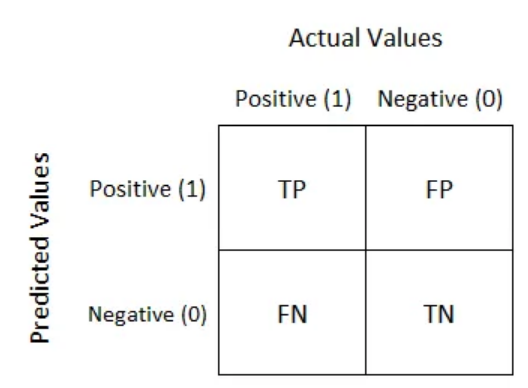

In [190]:
#Confusion Matrix is a performance measurement for machine learning classification problem 
#where output can be two or more classes. 
#It is a table with 4 different combinations of predicted and actual values.
Image(filename='image/confusion matrix-Copy1.png', width= 300)

In [191]:
#assign threshold value to differentiate (base = 50% prob)
treshold = 0.5

#assign new column for predicted class based on predicted probablities & treshold
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_pred_test_proba'] > treshold, 1,0)

In [192]:
y_test_proba.head()

,y_test_class_actual,y_pred_test_proba,y_test_class_predicted
128081,1,0.674962,1
68695,1,0.430070,0
280602,1,0.706268,1
93006,1,0.405965,0
125876,1,0.456908,0


In [193]:
#create confusion_matrix on percentage
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize='all')

array([[0.0536234 , 0.02710437],
       [0.29466855, 0.62460368]])

In [194]:
#create confusion_matrix on count
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'])

array([[ 3298,  1667],
       [18123, 38415]], dtype=int64)

### ROC Curve

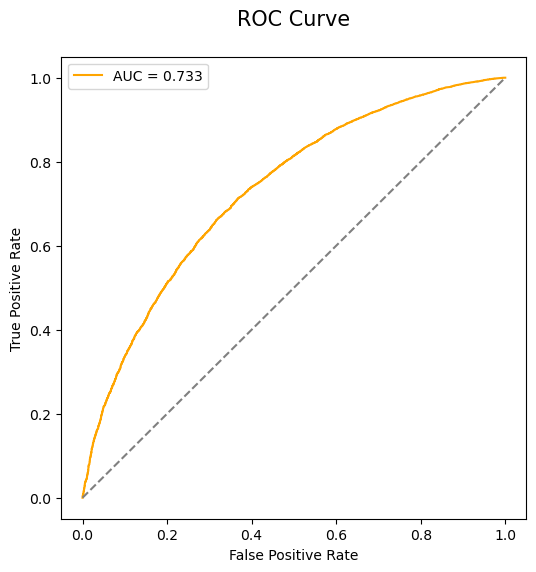

In [196]:
#false and true positive rate
fpr, tpr, treshold = roc_curve(y_true = y_test_proba['y_test_class_actual'], y_score=y_test_proba['y_pred_test_proba'])

#auc_score
auc = roc_auc_score(y_true=y_test_proba['y_test_class_actual'], y_score=y_test_proba['y_pred_test_proba'])

#plot roc curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}', color='orange')
plt.plot(fpr, fpr, linestyle= '--', color='grey')
plt.xlabel('False Positive Rate', fontsize= 10)
plt.ylabel('True Positive Rate', fontsize= 10)
plt.title('ROC Curve\n', fontsize=15)
plt.legend()

### The Precision-Recall (PR) curve
- The Precision-Recall (PR) curve used to evaluate the performance of a classification model, particularly in binary classification problems
-  It illustrates the trade-off between precision and recall at different classification thresholds
- Precision = TP/(TP + FP)
- Recall (Sensitivity) = TP/(TP + FN)
- The PR curve is created by plotting precision against recall at various threshold values for a model's predicted probabilities
- In a PR curve:
1. The x-axis represents recall.
2. The y-axis represents precision.
- A model with good performance will have a PR curve that hugs the upper-right corner, indicating high precision and high recall

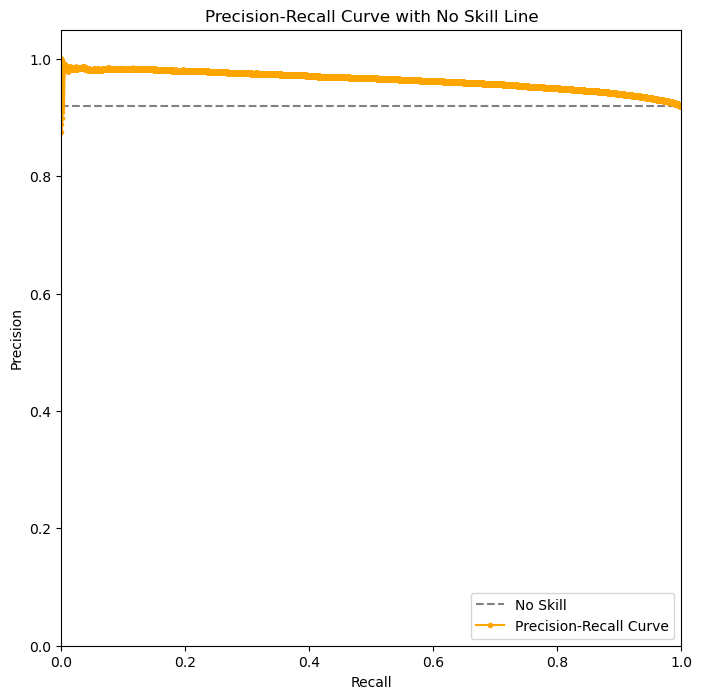

In [197]:
#no skill line as proportion of positive class
#1 in y_test means target good loan
#Count the number of positive instances in the test set
num_positive_instances = np.sum(y_test == 1)

#Calculate precision and recall for the "no skill" line
precision_no_skill = num_positive_instances/len(y_test)
recall_no_skill = 1.0 # All positive instances are captured

#create an array of recall values from 0 to 1
recall_values = np.linspace(start = 0, stop = 1, num = 100)

#calculate input pr curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_pred_test_proba'])

#set size
plt.figure(figsize=(8,8))

#plot no skill line
plt.plot(recall_values, np.full_like(recall_values, precision_no_skill),linestyle = '--', label='No Skill', color='gray')

##plot precision-recall curve
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve with No Skill Line')
plt.legend(loc='lower right')

**Insight:**  
- A PR curve that hugs the upper-right corner suggests good model performance.
- The model's PR curve should be above the "no skill" line to demonstrate its utility.
- Above the "no skill" line: The model is outperforming a random classifier.
- PR curve is significantly above the "no skill" line,  indicating that our model is adding value beyond random guessing.

## Score Card

In [198]:
score_card = summary

In [199]:
#create Ori_Feature_Name that contains the feature name
score_card['Ori_Feature_Name'] = score_card['Feature_Name'].str.split(':').str[0]

In [200]:
score_card

,Feature_Name,Coefficient,Ori_Feature_Name
0,intercept,0.064487,intercept
1,CODE_GENDER:M,-0.132485,CODE_GENDER
2,CODE_GENDER:F_XNA,0.187785,CODE_GENDER
3,NAME_EDUCATION_TYPE:Academic degree,1.036285,NAME_EDUCATION_TYPE
4,NAME_EDUCATION_TYPE:Higher education,0.086123,NAME_EDUCATION_TYPE
5,NAME_EDUCATION_TYPE:Incomplete higher,-0.128148,NAME_EDUCATION_TYPE
6,NAME_EDUCATION_TYPE:Lower secondary,-0.573407,NAME_EDUCATION_TYPE
7,NAME_EDUCATION_TYPE:Secondary / secondary special,-0.365554,NAME_EDUCATION_TYPE
8,NAME_FAMILY_STATUS:Single_Unknown,-0.026856,NAME_FAMILY_STATUS
9,NAME_FAMILY_STATUS:Civil marriage,-0.062306,NAME_FAMILY_STATUS


In [201]:
#define min and max score according to FICO
min_score = 300
max_score = 850

In [202]:
#group by sum of minimum coefficient for each category
min_sum_coef = score_card.groupby('Ori_Feature_Name')['Coefficient'].min().sum()

#group by sum of maximum coefficient for each category
max_sum_coef = score_card.groupby('Ori_Feature_Name')['Coefficient'].max().sum()

#calculate credit score
score_card['Score_Calculation'] = score_card['Coefficient'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

In [203]:
score_card

,Feature_Name,Coefficient,Ori_Feature_Name,Score_Calculation
0,intercept,0.064487,intercept,3.708175
1,CODE_GENDER:M,-0.132485,CODE_GENDER,-7.618286
2,CODE_GENDER:F_XNA,0.187785,CODE_GENDER,10.798138
3,NAME_EDUCATION_TYPE:Academic degree,1.036285,NAME_EDUCATION_TYPE,59.589276
4,NAME_EDUCATION_TYPE:Higher education,0.086123,NAME_EDUCATION_TYPE,4.952333
5,NAME_EDUCATION_TYPE:Incomplete higher,-0.128148,NAME_EDUCATION_TYPE,-7.368847
6,NAME_EDUCATION_TYPE:Lower secondary,-0.573407,NAME_EDUCATION_TYPE,-32.972500
7,NAME_EDUCATION_TYPE:Secondary / secondary special,-0.365554,NAME_EDUCATION_TYPE,-21.020411
8,NAME_FAMILY_STATUS:Single_Unknown,-0.026856,NAME_FAMILY_STATUS,-1.544309
9,NAME_FAMILY_STATUS:Civil marriage,-0.062306,NAME_FAMILY_STATUS,-3.582751


In [204]:
min_sum_score_pre1 = score_card.groupby('Ori_Feature_Name')['Score_Calculation'].min().sum()
max_sum_score_pre1 = score_card.groupby('Ori_Feature_Name')['Score_Calculation'].max().sum()
print(min_sum_score_pre1)
print(max_sum_score_pre1)

-250.94328473966988
299.0567152603301


In [205]:
#update calculated score of intercept(default score for each loan)
score_card.loc[0, 'Score_Calculation'] = ((score_card.loc[0, 'Coefficient'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
score_card['Score_Calculation'] = score_card['Score_Calculation'].round()

In [206]:
#check whether min and max is quite the same with FICO
min_sum_score_pre1 = score_card.groupby('Ori_Feature_Name')['Score_Calculation'].min().sum()
max_sum_score_pre1 = score_card.groupby('Ori_Feature_Name')['Score_Calculation'].max().sum()
print(min_sum_score_pre1)
print(max_sum_score_pre1)

299.0
852.0


In [207]:
score_card

,Feature_Name,Coefficient,Ori_Feature_Name,Score_Calculation
0,intercept,0.064487,intercept,555.0
1,CODE_GENDER:M,-0.132485,CODE_GENDER,-8.0
2,CODE_GENDER:F_XNA,0.187785,CODE_GENDER,11.0
3,NAME_EDUCATION_TYPE:Academic degree,1.036285,NAME_EDUCATION_TYPE,60.0
4,NAME_EDUCATION_TYPE:Higher education,0.086123,NAME_EDUCATION_TYPE,5.0
5,NAME_EDUCATION_TYPE:Incomplete higher,-0.128148,NAME_EDUCATION_TYPE,-7.0
6,NAME_EDUCATION_TYPE:Lower secondary,-0.573407,NAME_EDUCATION_TYPE,-33.0
7,NAME_EDUCATION_TYPE:Secondary / secondary special,-0.365554,NAME_EDUCATION_TYPE,-21.0
8,NAME_FAMILY_STATUS:Single_Unknown,-0.026856,NAME_FAMILY_STATUS,-2.0
9,NAME_FAMILY_STATUS:Civil marriage,-0.062306,NAME_FAMILY_STATUS,-4.0


## Credit Score for all observations in Test Dataset
If we have a test set and a scorecard with associated scores and we want to perform matrix dot multiplication, we need to ensure that both the test set and the scorecard scores are in a format that allows matrix multiplication.

Matrix dot multiplication (also known as matrix multiplication or dot product) of a test set with a scorecard score is a common operation in the context of credit scoring, risk modeling, and other related fields. This operation is a key step in the calculation of credit scores or risk scores based on a set of features and associated weights.

1. Features and Weights:
- In credit scoring or risk modeling, a scorecard consists of a set of features (characteristics) that describe an individual or an entity.
- Each feature is assigned a weight or score based on its importance in predicting the outcome (e.g., creditworthiness).

2. Scoring Formula:
- The scoring formula is often a weighted sum of the features, and it can be represented mathematically as follows: Score = Feature * Weight 
- The dot product is a concise way to express this calculation.

3. Matrix Dot Multiplication:
- The test set, representing new instances or individuals, is a matrix where each row corresponds to a single instance, and each column corresponds to a feature.
- The scorecard scores represent the weights associated with each feature.

4. Calculation:
- The dot product of the test set and the scorecard scores results in a new vector (or column) where each element represents the calculated score for the corresponding instance in the test set.
- This can be expressed mathematically as follows: Scores = Test Set × Scorecard Scores

5. Credit/Risk Scoring:
- The resulting scores can be interpreted as a measure of creditworthiness or risk. Higher scores may indicate lower risk or higher creditworthiness, depending on the specific scoring model.

In summary, matrix dot multiplication simplifies the calculation of scores based on a scorecard, allowing for a scalable and efficient implementation of credit scoring or risk modeling in machine learning.

In [208]:
#create transformed test set through WOE Binning
x_test_woe_transform = woe_transform.transform(x_tests)

In [209]:
x_test_woe_transform.head(2)

,CODE_GENDER:M,CODE_GENDER:F_XNA,NAME_EDUCATION_TYPE:Academic degree,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_FAMILY_STATUS:Single_Unknown,NAME_FAMILY_STATUS:Civil marriage,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:Separated,NAME_FAMILY_STATUS:Widow,NAME_INCOME_TYPE:Business_comm,NAME_INCOME_TYPE:Pensioner,NAME_INCOME_TYPE:student_unemployed,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Working,AMT_CREDIT:<846000,AMT_CREDIT:846000-1647000,AMT_CREDIT:1647000-2448000,AMT_CREDIT:2448000-3249000,AMT_CREDIT:>3249000,REGION_POPULATION_RELATIVE:<0.0147,REGION_POPULATION_RELATIVE:0.0147-0.0292,REGION_POPULATION_RELATIVE:0.0292-0.0436,REGION_POPULATION_RELATIVE:0.0436-0.0581,REGION_POPULATION_RELATIVE:>0.0581,YEAR_BIRTH:<30,YEAR_BIRTH:30-40,YEAR_BIRTH:40-50,YEAR_BIRTH:50-60,YEAR_BIRTH:>60,YEAR_EMPLOYED:<4,YEAR_EMPLOYED:4-8,YEAR_EMPLOYED:8-12,YEAR_EMPLOYED:12-16,YEAR_EMPLOYED:>16,YEAR_REGISTRATION:<17,YEAR_REGISTRATION:17-34,YEAR_REGISTRATION:34-51,YEAR_REGISTRATION:>51,YEAR_ID_PUBLISH:<4,YEAR_ID_PUBLISH:4-8,YEAR_ID_PUBLISH:8-12,YEAR_ID_PUBLISH:12-16,YEAR_ID_PUBLISH:>16,REGION_RATING_CLIENT_W_CITY:0,REGION_RATING_CLIENT_W_CITY:1,REGION_RATING_CLIENT_W_CITY:2,EXT_SOURCE_2:<0.0855,EXT_SOURCE_2:0.0855-0.171,EXT_SOURCE_2:0.171-0.256,EXT_SOURCE_2:0.256-0.342,EXT_SOURCE_2:0.342-0.427,EXT_SOURCE_2:0.427-0.513,EXT_SOURCE_2:0.513-0.598,EXT_SOURCE_2:0.598-0.684,EXT_SOURCE_2:0.684-0.769,EXT_SOURCE_2:>0.769,EXT_SOURCE_3:<0.0901,EXT_SOURCE_3:0.0901-0.18,EXT_SOURCE_3:0.18-0.269,EXT_SOURCE_3:0.269-0.359,EXT_SOURCE_3:0.359-0.448,EXT_SOURCE_3:0.448-0.538,EXT_SOURCE_3:0.538-0.627,EXT_SOURCE_3:0.627-0.717,EXT_SOURCE_3:0.717-0.806,EXT_SOURCE_3:>0.806
128081,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
68695,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [210]:
#add intercept column in beginning & fill with 1
x_test_woe_transform.insert(0, 'Intercept', 1)

In [211]:
x_test_woe_transform.head(2)

,Intercept,CODE_GENDER:M,CODE_GENDER:F_XNA,NAME_EDUCATION_TYPE:Academic degree,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_FAMILY_STATUS:Single_Unknown,NAME_FAMILY_STATUS:Civil marriage,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:Separated,NAME_FAMILY_STATUS:Widow,NAME_INCOME_TYPE:Business_comm,NAME_INCOME_TYPE:Pensioner,NAME_INCOME_TYPE:student_unemployed,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Working,AMT_CREDIT:<846000,AMT_CREDIT:846000-1647000,AMT_CREDIT:1647000-2448000,AMT_CREDIT:2448000-3249000,AMT_CREDIT:>3249000,REGION_POPULATION_RELATIVE:<0.0147,REGION_POPULATION_RELATIVE:0.0147-0.0292,REGION_POPULATION_RELATIVE:0.0292-0.0436,REGION_POPULATION_RELATIVE:0.0436-0.0581,REGION_POPULATION_RELATIVE:>0.0581,YEAR_BIRTH:<30,YEAR_BIRTH:30-40,YEAR_BIRTH:40-50,YEAR_BIRTH:50-60,YEAR_BIRTH:>60,YEAR_EMPLOYED:<4,YEAR_EMPLOYED:4-8,YEAR_EMPLOYED:8-12,YEAR_EMPLOYED:12-16,YEAR_EMPLOYED:>16,YEAR_REGISTRATION:<17,YEAR_REGISTRATION:17-34,YEAR_REGISTRATION:34-51,YEAR_REGISTRATION:>51,YEAR_ID_PUBLISH:<4,YEAR_ID_PUBLISH:4-8,YEAR_ID_PUBLISH:8-12,YEAR_ID_PUBLISH:12-16,YEAR_ID_PUBLISH:>16,REGION_RATING_CLIENT_W_CITY:0,REGION_RATING_CLIENT_W_CITY:1,REGION_RATING_CLIENT_W_CITY:2,EXT_SOURCE_2:<0.0855,EXT_SOURCE_2:0.0855-0.171,EXT_SOURCE_2:0.171-0.256,EXT_SOURCE_2:0.256-0.342,EXT_SOURCE_2:0.342-0.427,EXT_SOURCE_2:0.427-0.513,EXT_SOURCE_2:0.513-0.598,EXT_SOURCE_2:0.598-0.684,EXT_SOURCE_2:0.684-0.769,EXT_SOURCE_2:>0.769,EXT_SOURCE_3:<0.0901,EXT_SOURCE_3:0.0901-0.18,EXT_SOURCE_3:0.18-0.269,EXT_SOURCE_3:0.269-0.359,EXT_SOURCE_3:0.359-0.448,EXT_SOURCE_3:0.448-0.538,EXT_SOURCE_3:0.538-0.627,EXT_SOURCE_3:0.627-0.717,EXT_SOURCE_3:0.717-0.806,EXT_SOURCE_3:>0.806
128081,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
68695,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [212]:
#create list for scorecard score
scorecard_score = score_card['Score_Calculation'].to_frame().to_numpy()

In [213]:
#check shape of test_set & scorecard score before matrix dot multiplication
print(x_test_woe_transform.shape)
print(scorecard_score.shape)

(61503, 70)
(70, 1)


In [214]:
#matrix dot multiplication on test set with scorecard score
y_score = x_test_woe_transform.dot(scorecard_score)

In [215]:
y_score.head()

,0
128081,592.0
68695,534.0
280602,601.0
93006,529.0
125876,541.0


## Loan Approval Cut Off
**Youden's J-Statistic**
- Youden's J-Statistic, also known as the Youden Index or J statistic, is a metric used to identify the optimal threshold in binary classification problems. 
- In binary classification, a model assigns each instance to one of two classes, and a threshold is used to determine which class an instance belongs to based on a continuous probability or score generated by the model.
- The Youden's J-Statistic is calculated using the formula:   
J=True Positive Rate(TPR or Sensitivity) − False Positive Rate  
Sensitivity = the true positive rate (or recall)   

### Best Threshold Using Youden J-Statistic

In [216]:
#calculate Youden J-Statistic to identify the best threshold
J = tpr - fpr

#locate index of largest J
#np.argmax returns the indices of the maximum values along an axis
index = np.argmax(J)

#best threshold
best_threshold = thresholds[index].round(6)

print(f'Best threshold : {best_threshold}')

Best threshold : 0.353918


**Insight:**
- J = Sensitivity (True Positive Rate) + Specificity (True Negative Rate) − 1
- Threshold = 0.353918 means that, according to this criterion, this threshold provides the best trade-off between sensitivity and specificity for our model. Best threshold is used to minimized the FPR and maximize the TPR

### Confusion Matrix with Threshold = 0.5
Using Confusion Matrix to confirm best threshold

#### Classification Report

In [228]:
y_test_proba.head(2)

,y_test_class_actual,y_pred_test_proba,y_test_class_predicted
128081,1,0.674962,1
68695,1,0.430070,0


In [229]:
#classification report
threshold = 0.5

y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_pred_test_proba'] > threshold, 1 , 0)

print(classification_report(y_true = y_test_proba['y_test_class_actual'], y_pred= y_test_proba['y_test_class_predicted']))

              precision    recall  f1-score   support

           0       0.15      0.66      0.25      4965
           1       0.96      0.68      0.80     56538

    accuracy                           0.68     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.68      0.75     61503



**Precision**  
- The precision tells us the accuracy of positive predictions.
- Precision = true positive / (true positive + false positive)
- **Conclusion: Out of all the loan status that the model predicted would get good loan, only 96% actually did.**

**Recall**
- The recall, also named sensivity, or hit rate, tells us the fraction of correctly identified positive predictions.
- recall = true positive / (true positive + false negative)
- **Conclusion: Out of all the loan status that actually did get good loan, the model only predicted this outcome correctly for 68% of those loan status**

**F1 Score**  
- The f1-score, or F measure, measures precision and recall at the same time by finding the harmonic mean of the two values.
- This score is useful when you have opposite scores coming from precision and recall.
- f1 score = 2 * ((recall * precision) / (recall + precision))
- **Conclusion:   
F1 Score = 0.8.   
According to (spotintelligence.com, 2023) as a general rule of thumb, an F1 score of 0.7 or higher is often considered good.  
So the model does a good job of predicting whether the loan status is considered good or bad.**

**Accuracy**
- The accuracy is not really good because we've got 0.68 out of 1

#### Confusion Matrix

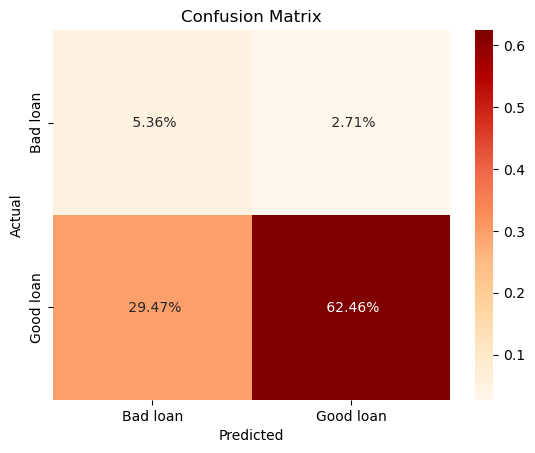

In [230]:
#compute confusion matrix
actual_label = y_test_proba['y_test_class_actual']
predicted_label = y_test_proba['y_test_class_predicted']
conf_matrix = confusion_matrix(actual_label, predicted_label)

#normalize the confusion matrix to get percentages
conf_matrix_percent = conf_matrix / np.sum(conf_matrix, keepdims=True)

#group names
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
#group count
group_count = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
#group percentage
group_percentage = ["{0: 0.2%}".format(value) for value in conf_matrix_percent.flatten()]

#label
labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names, group_count, group_percentage)]

#reshape counts for seaborn in heatmap 
labels = np.asarray(labels).reshape(2,2)

#create seaborn heatmap
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='OrRd', xticklabels=['Bad loan','Good loan'], yticklabels=['Bad loan','Good loan'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix with Best Threshold 

In [231]:
#classification report
threshold = best_threshold

y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_pred_test_proba'] > threshold, 1 , 0)

print(classification_report(y_true = y_test_proba['y_test_class_actual'], y_pred= y_test_proba['y_test_class_predicted']))

              precision    recall  f1-score   support

           0       0.22      0.41      0.29      4965
           1       0.94      0.88      0.91     56538

    accuracy                           0.84     61503
   macro avg       0.58      0.64      0.60     61503
weighted avg       0.89      0.84      0.86     61503



**Precision**  
- Out of all the loan status that the model predicted would get good loan, only 94% actually did.

**Recall**
- Out of all the loan status that actually did get good loan, the model only predicted this outcome correctly for 88% of those loan status

**F1 Score**     
- F1 Score = 0.91.   
- According to (spotintelligence.com, 2023) as a general rule of thumb, an F1 score of 0.7 or higher is often considered good.  
So the model does a good job of predicting whether the loan status is considered good or bad.

**Accuracy**
- The accuracy increased significantly from 0.68 to 0.84

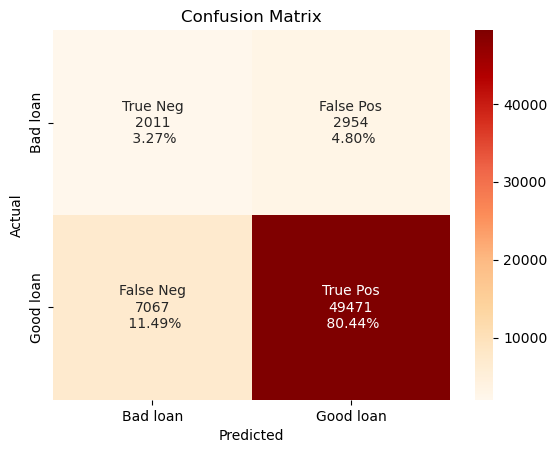

In [239]:
#compute confusion matrix
actual_label = y_test_proba['y_test_class_actual']
predicted_label = y_test_proba['y_test_class_predicted']
conf_matrix = confusion_matrix(actual_label, predicted_label)

#normalize the confusion matrix to get percentages
conf_matrix_percent = conf_matrix / np.sum(conf_matrix, keepdims=True)

#group names
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
#group count
group_count = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
#group percentage
group_percentage = ["{0: 0.2%}".format(value) for value in conf_matrix_percent.flatten()]

#label
labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names, group_count, group_percentage)]

#reshape counts for seaborn in heatmap 
labels = np.asarray(labels).reshape(2,2)

#create seaborn heatmap
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='OrRd', xticklabels=['Bad loan','Good loan'], yticklabels=['Bad loan','Good loan'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [241]:
#create df threshold from precision_recall_curve
df_cutoff = pd.DataFrame(thresholds, columns= ['threshold'])

#score_card = Coefficient * (max_score - min_score) / (max_sum_coef - min_sum_coef)
coefficient = np.log(df_cutoff['threshold'] / (1 - df_cutoff['threshold'])) - min_sum_coef
df_cutoff['score'] = ((coefficient) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [242]:
df_cutoff.head()

,threshold,score
0,0.043665,373.0
1,0.045496,376.0
2,0.045516,376.0
3,0.050081,382.0
4,0.050357,382.0


### Approval & Rejection Rate

In [248]:
y_test_proba.head(2)

,y_test_class_actual,y_pred_test_proba,y_test_class_predicted
128081,1,0.674962,1
68695,1,0.430070,1


In [249]:
#assign value of 1 if each predicted probability > threshold and sum number of row
def n_approved(thresh):
    df = np.where(y_test_proba['y_pred_test_proba'] >= thresh, 1, 0).sum()
    return df

In [251]:
df_cutoff.head(2)

,threshold,score
0,0.043665,373.0
1,0.045496,376.0


In [252]:
#If we consider that every credit application with a probability above a certain threshold of being 'good' gets approved,
#applying the 'n_approved' function to that threshold gives us the count of approved applications.
# In this way, we're figuring out how many applications are approved for all the different thresholds.
#apply method is used to apply the function n_approved to each element in the 'threshold' column
df_cutoff['n_approved'] = df_cutoff['threshold'].apply(n_approved)

In [255]:
#check total number of applications
y_test_proba['y_pred_test_proba'].shape

(61503,)

In [260]:
#get total number of applications
y_test_proba['y_pred_test_proba'].shape[0]

61503

In [257]:
#calculate number of rejected application
df_cutoff['n_rejected'] = y_test_proba['y_pred_test_proba'].shape[0] - df_cutoff['n_approved']

In [259]:
#calculate approval rate = n_approved : total number of applications
df_cutoff['approval_rate'] = df_cutoff['n_approved'] / y_test_proba['y_pred_test_proba'].shape[0]

In [261]:
#calculate rejection rate = 1 - approval_rate
df_cutoff['rejection_rate'] = 1 - df_cutoff['approval_rate']

In [263]:
df_cutoff.head(3)

,threshold,score,n_approved,n_rejected,approval_rate,rejection_rate
0,0.043665,373.0,61503,0,1.000000,0.000000
1,0.045496,376.0,61501,2,0.999967,0.000033
2,0.045516,376.0,61500,3,0.999951,0.000049


In [264]:
best_threshold

0.353918

In [266]:
#approval & rejection rate on best threshold
df_cutoff[df_cutoff['threshold'].between(0.353917,0.353919)]

,threshold,score,n_approved,n_rejected,approval_rate,rejection_rate
8354,0.353918,516.0,52426,9077,0.852414,0.147586


with best threshold = 0.353918, we've got credit score = 516

In [267]:
#compare with threshold = 0.5
df_cutoff[df_cutoff['threshold'].between(0.5,0.5001)]

,threshold,score,n_approved,n_rejected,approval_rate,rejection_rate
19231,0.500012,551.0,40082,21421,0.651708,0.348292
19232,0.500023,551.0,40081,21422,0.651692,0.348308
19233,0.500027,551.0,40080,21423,0.651676,0.348324
19234,0.500042,551.0,40078,21425,0.651643,0.348357
19235,0.500047,551.0,40075,21428,0.651594,0.348406
19236,0.500058,551.0,40074,21429,0.651578,0.348422
19237,0.500070,551.0,40073,21430,0.651562,0.348438
19238,0.500080,551.0,40072,21431,0.651545,0.348455
19239,0.500098,551.0,40071,21432,0.651529,0.348471


- Choosing a 0.5 threshold might mean rejecting a lot of applicants, which could lead to losing business
- So, we've decided to keep our preferred threshold = 0.353918 and Credit Score of 516

In [270]:
score_card.head(2)

,Feature_Name,Coefficient,Ori_Feature_Name,Score_Calculation
0,intercept,0.064487,intercept,555.0
1,CODE_GENDER:M,-0.132485,CODE_GENDER,-8.0


In [272]:
#extract spesific feature from Feature_Name
score_card['Spesific_Feature'] = score_card['Feature_Name'].apply(lambda x : x.split(':')[1] if x != 'intercept' else 'intercept')

In [274]:
score_card

,Feature_Name,Coefficient,Ori_Feature_Name,Score_Calculation,Spesific_Feature
0,intercept,0.064487,intercept,555.0,intercept
1,CODE_GENDER:M,-0.132485,CODE_GENDER,-8.0,M
2,CODE_GENDER:F_XNA,0.187785,CODE_GENDER,11.0,F_XNA
3,NAME_EDUCATION_TYPE:Academic degree,1.036285,NAME_EDUCATION_TYPE,60.0,Academic degree
4,NAME_EDUCATION_TYPE:Higher education,0.086123,NAME_EDUCATION_TYPE,5.0,Higher education
5,NAME_EDUCATION_TYPE:Incomplete higher,-0.128148,NAME_EDUCATION_TYPE,-7.0,Incomplete higher
6,NAME_EDUCATION_TYPE:Lower secondary,-0.573407,NAME_EDUCATION_TYPE,-33.0,Lower secondary
7,NAME_EDUCATION_TYPE:Secondary / secondary special,-0.365554,NAME_EDUCATION_TYPE,-21.0,Secondary / secondary special
8,NAME_FAMILY_STATUS:Single_Unknown,-0.026856,NAME_FAMILY_STATUS,-2.0,Single_Unknown
9,NAME_FAMILY_STATUS:Civil marriage,-0.062306,NAME_FAMILY_STATUS,-4.0,Civil marriage


## Predit Dataset Test

In [275]:
df_test = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Science - Home Credit Indonesia\Final Task\home-credit-default-risk/application_test.csv')

In [ ]:
#selected_col = selected_cat_col + select_num_final

In [278]:
#display df_test only for selected_col
df_test = df_test[selected_col]

In [279]:
df_test.head(2)

,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,N,F,Higher education,Married,Working,0,568800.0,0.018850,-19241,-2329,-5170.0,-812,2,0.789654,0.159520,-1740.0
1,N,M,Secondary / secondary special,Married,Working,0,222768.0,0.035792,-18064,-4469,-9118.0,-1623,2,0.291656,0.432962,0.0


### Handling missing value on numerical columns

In [280]:
#SimpleImputer is used for imputing missing values in numerical data
from sklearn.impute import SimpleImputer

In [281]:
#handling missing value on numerical columns with median
numimputer = SimpleImputer(strategy = 'median')

In [283]:
#Fit the imputer on test data
numimputer.fit(df_test[select_num_final])

SimpleImputer(strategy='median')

In [284]:
df_test[select_num_final] = numimputer.transform(df_test[select_num_final])

### Feature Encoding

In [285]:
#One Hot Encoding on categorical values
df_test = create_dummy(df_test, selected_cat_col)

In [286]:
#'reindex' align the columns of df_test with column of x_trains
df_test = df_test.reindex(labels = x_trains.columns, axis= 1, fill_value= 0)

In [290]:
df_test.head(2)

,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_CAR:N,FLAG_OWN_CAR:Y,CODE_GENDER:F,CODE_GENDER:M,CODE_GENDER:XNA,NAME_EDUCATION_TYPE:Academic degree,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_FAMILY_STATUS:Civil marriage,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:Separated,NAME_FAMILY_STATUS:Single / not married,NAME_FAMILY_STATUS:Unknown,NAME_FAMILY_STATUS:Widow,NAME_INCOME_TYPE:Businessman,NAME_INCOME_TYPE:Commercial associate,NAME_INCOME_TYPE:Pensioner,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Student,NAME_INCOME_TYPE:Unemployed,NAME_INCOME_TYPE:Working
0,N,F,Higher education,Married,Working,0.0,568800.0,0.018850,-19241.0,-2329.0,-5170.0,-812.0,2.0,0.789654,0.159520,-1740.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,N,M,Secondary / secondary special,Married,Working,0.0,222768.0,0.035792,-18064.0,-4469.0,-9118.0,-1623.0,2.0,0.291656,0.432962,0.0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [288]:
#create transform set through WOE Binning
x_test_woe_transformed = woe_transform.transform(df_test)

#add intercept column in beginning & fill with 1
x_test_woe_transformed.insert(0, 'Intercept', 1)

In [289]:
x_test_woe_transformed.head(2)

,Intercept,CODE_GENDER:M,CODE_GENDER:F_XNA,NAME_EDUCATION_TYPE:Academic degree,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_FAMILY_STATUS:Single_Unknown,NAME_FAMILY_STATUS:Civil marriage,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:Separated,NAME_FAMILY_STATUS:Widow,NAME_INCOME_TYPE:Business_comm,NAME_INCOME_TYPE:Pensioner,NAME_INCOME_TYPE:student_unemployed,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Working,AMT_CREDIT:<846000,AMT_CREDIT:846000-1647000,AMT_CREDIT:1647000-2448000,AMT_CREDIT:2448000-3249000,AMT_CREDIT:>3249000,REGION_POPULATION_RELATIVE:<0.0147,REGION_POPULATION_RELATIVE:0.0147-0.0292,REGION_POPULATION_RELATIVE:0.0292-0.0436,REGION_POPULATION_RELATIVE:0.0436-0.0581,REGION_POPULATION_RELATIVE:>0.0581,YEAR_BIRTH:<30,YEAR_BIRTH:30-40,YEAR_BIRTH:40-50,YEAR_BIRTH:50-60,YEAR_BIRTH:>60,YEAR_EMPLOYED:<4,YEAR_EMPLOYED:4-8,YEAR_EMPLOYED:8-12,YEAR_EMPLOYED:12-16,YEAR_EMPLOYED:>16,YEAR_REGISTRATION:<17,YEAR_REGISTRATION:17-34,YEAR_REGISTRATION:34-51,YEAR_REGISTRATION:>51,YEAR_ID_PUBLISH:<4,YEAR_ID_PUBLISH:4-8,YEAR_ID_PUBLISH:8-12,YEAR_ID_PUBLISH:12-16,YEAR_ID_PUBLISH:>16,REGION_RATING_CLIENT_W_CITY:0,REGION_RATING_CLIENT_W_CITY:1,REGION_RATING_CLIENT_W_CITY:2,EXT_SOURCE_2:<0.0855,EXT_SOURCE_2:0.0855-0.171,EXT_SOURCE_2:0.171-0.256,EXT_SOURCE_2:0.256-0.342,EXT_SOURCE_2:0.342-0.427,EXT_SOURCE_2:0.427-0.513,EXT_SOURCE_2:0.513-0.598,EXT_SOURCE_2:0.598-0.684,EXT_SOURCE_2:0.684-0.769,EXT_SOURCE_2:>0.769,EXT_SOURCE_3:<0.0901,EXT_SOURCE_3:0.0901-0.18,EXT_SOURCE_3:0.18-0.269,EXT_SOURCE_3:0.269-0.359,EXT_SOURCE_3:0.359-0.448,EXT_SOURCE_3:0.448-0.538,EXT_SOURCE_3:0.538-0.627,EXT_SOURCE_3:0.627-0.717,EXT_SOURCE_3:0.717-0.806,EXT_SOURCE_3:>0.806
0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Score Card

In [291]:
score_card.head()

,Feature_Name,Coefficient,Ori_Feature_Name,Score_Calculation,Spesific_Feature
0,intercept,0.064487,intercept,555.0,intercept
1,CODE_GENDER:M,-0.132485,CODE_GENDER,-8.0,M
2,CODE_GENDER:F_XNA,0.187785,CODE_GENDER,11.0,F_XNA
3,NAME_EDUCATION_TYPE:Academic degree,1.036285,NAME_EDUCATION_TYPE,60.0,Academic degree
4,NAME_EDUCATION_TYPE:Higher education,0.086123,NAME_EDUCATION_TYPE,5.0,Higher education


In [292]:
#list of scorecard
score_card_score = score_card['Score_Calculation'].to_frame().to_numpy()

In [293]:
#check shape of test set & scorecard before matrix dot multiplication
print(f'x_test_woe_transformed : {x_test_woe_transformed.shape}')
print(f'score_card_score : {score_card_score.shape}')

x_test_woe_transformed : (48744, 70)
score_card_score : (70, 1)


In [294]:
#getting score card value through matrix dot multiplication
y_test_score = x_test_woe_transformed.dot(score_card_score)

In [295]:
y_test_score.head()

,0
0,580.0
1,524.0
2,640.0
3,570.0
4,519.0


### Approval & Rejection Rate	

In [296]:
#create df threshold from precision_recall_curve
df_test_cutoff = pd.DataFrame(thresholds, columns= ['threshold'])

#score_card = Coefficient * (max_score - min_score) / (max_sum_coef - min_sum_coef)
coefficient_test = np.log(df_test_cutoff['threshold'] / (1 - df_test_cutoff['threshold'])) - min_sum_coef
df_test_cutoff['score'] = ((coefficient_test) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [300]:
df_test_cutoff.head(2)

,threshold,score,n_approved,n_rejected,approval_rate,rejection_rate
0,0.043665,373.0,61503,0,1.000000,0.000000
1,0.045496,376.0,61501,2,0.999967,0.000033


In [298]:
#calculate number of approved application
df_test_cutoff['n_approved'] = df_test_cutoff['threshold'].apply(n_approved)

#calculate number of rejected application
df_test_cutoff['n_rejected'] = y_test_proba['y_pred_test_proba'].shape[0] - df_test_cutoff['n_approved']

#calculate approval rate = n_approved : total number of applications
df_test_cutoff['approval_rate'] = df_test_cutoff['n_approved'] / y_test_proba['y_pred_test_proba'].shape[0]

#calculate rejection rate = 1 - approval_rate
df_test_cutoff['rejection_rate'] = 1 - df_test_cutoff['approval_rate']

In [299]:
df_test_cutoff.head(2)

,threshold,score,n_approved,n_rejected,approval_rate,rejection_rate
0,0.043665,373.0,61503,0,1.000000,0.000000
1,0.045496,376.0,61501,2,0.999967,0.000033


In [301]:
best_threshold

0.353918

In [302]:
#approval & rejection rate on best threshold
df_test_cutoff[df_test_cutoff['threshold'].between(0.353917,0.353919)]

,threshold,score,n_approved,n_rejected,approval_rate,rejection_rate
8354,0.353918,516.0,52426,9077,0.852414,0.147586


with best threshold = 0.353918, we've got credit score = 516

In [303]:
#compare with threshold = 0.5
df_test_cutoff[df_test_cutoff['threshold'].between(0.5,0.5001)]

,threshold,score,n_approved,n_rejected,approval_rate,rejection_rate
19231,0.500012,551.0,40082,21421,0.651708,0.348292
19232,0.500023,551.0,40081,21422,0.651692,0.348308
19233,0.500027,551.0,40080,21423,0.651676,0.348324
19234,0.500042,551.0,40078,21425,0.651643,0.348357
19235,0.500047,551.0,40075,21428,0.651594,0.348406
19236,0.500058,551.0,40074,21429,0.651578,0.348422
19237,0.500070,551.0,40073,21430,0.651562,0.348438
19238,0.500080,551.0,40072,21431,0.651545,0.348455
19239,0.500098,551.0,40071,21432,0.651529,0.348471
